# Name = Divyanshu_Singh

# Batch = DS2306

.

.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import KNNImputer,IterativeImputer,SimpleImputer
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV


import warnings
warnings.filterwarnings('ignore')

.

In [2]:
df = pd.read_csv('weatherAUS.csv')
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [4]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [5]:
df.isnull().sum()/df.shape[0]*100

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [6]:
# There are alot of null values present
# In Evaporation and Sunshine more than 45% of the data is absent so its better to drop them

In [7]:
df.duplicated().sum()

1663

In [8]:
# 1663 duplicates are present

In [9]:
df=df.drop_duplicates()

In [10]:
df.shape

(6762, 23)

In [11]:
df = df.drop(['Evaporation','Sunshine'],axis=1)

In [12]:
df = df.dropna(subset=['RainToday','RainTomorrow'])

In [13]:
df.isnull().sum()/df.shape[0]*100

Date              0.000000
Location          0.000000
MinTemp           0.716682
MaxTemp           0.518451
Rainfall          0.000000
WindGustDir      13.754193
WindGustSpeed    13.754193
WindDir9am       11.695639
WindDir3pm        4.162855
WindSpeed9am      0.625191
WindSpeed3pm      1.219884
Humidity9am       0.533699
Humidity3pm       1.174138
Pressure9am      19.579140
Pressure3pm      19.594389
Cloud9am         26.517231
Cloud3pm         27.142421
Temp9am           0.487954
Temp3pm           1.113144
RainToday         0.000000
RainTomorrow      0.000000
dtype: float64

In [14]:
df.nunique()

Date             2957
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
WindGustDir        16
WindGustSpeed      51
WindDir9am         16
WindDir3pm         16
WindSpeed9am       33
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       382
Pressure3pm       373
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           327
RainToday           2
RainTomorrow        2
dtype: int64

In [15]:
df.dropna()

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
4     2008-12-05   Albury     17.5     32.3       1.0           W   
11    2008-12-12   Albury     15.9     21.7       2.2         NNE   
12    2008-12-13   Albury     15.9     18.6      15.6           W   
16    2008-12-17   Albury     14.1     20.9       0.0         ENE   
17    2008-12-18   Albury     13.5     22.9      16.8           W   
...          ...      ...      ...      ...       ...         ...   
8385  2012-11-10   Darwin     24.9     34.3       0.0           N   
8393  2017-05-25    Uluru     14.6     26.3       0.0           S   
8397  2017-05-29    Uluru     12.7     22.2       0.0           E   
8398  2017-05-30    Uluru      9.4     22.7       0.0           E   
8423  2017-06-24    Uluru      7.8     27.0       0.0          SE   

      WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity9am  \
4              41.0        ENE         NW           7.0  ...         82.0   
11             31.0         NE        ENE          15.0  ...         89.0   
12             61.0        NNW        NNW          28.0  ...         76.0   
16             22.0        SSW          E          11.0  ...         69.0   
17             63.0          N        WNW           6.0  ...         80.0   
...             ...        ...        ...           ...  ...          ...   
8385           39.0        ENE         NE          17.0  ...         63.0   
8393           37.0        SSW          S          19.0  ...         61.0   
8397           37.0          E        ESE          19.0  ...         59.0   
8398           35.0         SE          E          13.0  ...         62.0   
8423           28.0        SSE          N          13.0  ...         51.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
4            33.0       1010.8       1006.0       7.0       8.0     17.8   
11           91.0       1010.5       1004.2       8.0       8.0     15.9   
12           93.0        994.3        993.0       8.0       8.0     17.4   
16           82.0       1012.2       1010.4       8.0       1.0     17.2   
17           65.0       1005.8       1002.2       8.0       1.0     18.0   
...           ...          ...          ...       ...       ...      ...   
8385         46.0       1012.1       1007.9       7.0       3.0     29.8   
8393         36.0       1022.0       1018.6       7.0       1.0     15.4   
8397         34.0       1024.3       1021.7       8.0       8.0     13.9   
8398         32.0       1026.6       1023.6       8.0       4.0     11.8   
8423         24.0       1019.4       1016.5       3.0       2.0     15.1   

      Temp3pm  RainToday RainTomorrow  
4        29.7         No           No  
11       17.0        Yes          Yes  
12       15.8        Yes          Yes  
16       18.1         No          Yes  
17       21.5        Yes          Yes  
...       ...        ...          ...  
8385     33.2         No           No  
8393     25.0         No           No  
8397     21.0         No           No  
8398     22.3         No           No  
8423     26.0         No           No  

[3643 rows x 21 columns]

In [16]:
# close to 50% of the data is lost by dropping all nan

<Axes: ylabel='RainToday'>

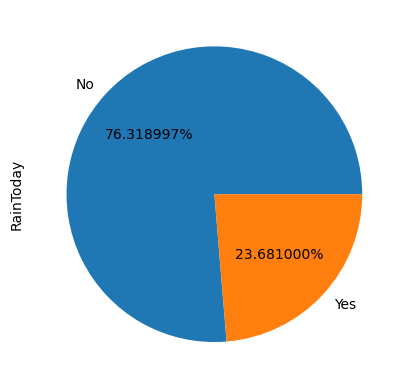

In [17]:
df.RainToday.value_counts().plot.pie(autopct='%2f%%')

<Axes: ylabel='RainTomorrow'>

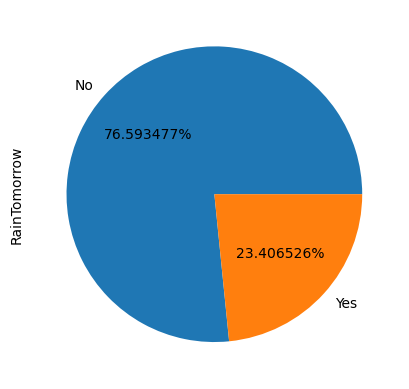

In [18]:
df.RainTomorrow.value_counts().plot.pie(autopct='%2f%%')

In [19]:
df.Location.value_counts()

PerthAirport    1204
Albury           889
Newcastle        804
Melbourne        721
CoffsHarbour     609
Brisbane         569
Williamtown      568
Penrith          476
Darwin           250
Wollongong       232
Adelaide         198
Uluru             38
Name: Location, dtype: int64

In [20]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [21]:
knni = KNNImputer(n_neighbors=2)
df[['MinTemp', 'MaxTemp', 'Rainfall',
       'WindGustSpeed',  'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']] = knni.fit_transform(df[['MinTemp', 
       'MaxTemp', 'Rainfall','WindGustSpeed',  'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']])

In [22]:
df.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
WindGustDir      902
WindGustSpeed      0
WindDir9am       767
WindDir3pm       273
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow       0
dtype: int64

In [23]:
df.nunique()

Date             2957
Location           12
MinTemp           302
MaxTemp           339
Rainfall          250
WindGustDir        16
WindGustSpeed     130
WindDir9am         16
WindDir3pm         16
WindSpeed9am       46
WindSpeed3pm       53
Humidity9am       103
Humidity3pm       115
Pressure9am       700
Pressure3pm       681
Cloud9am           17
Cloud3pm           17
Temp9am           315
Temp3pm           344
RainToday           2
RainTomorrow        2
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6558 entries, 0 to 8423
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6558 non-null   object 
 1   Location       6558 non-null   object 
 2   MinTemp        6558 non-null   float64
 3   MaxTemp        6558 non-null   float64
 4   Rainfall       6558 non-null   float64
 5   WindGustDir    5656 non-null   object 
 6   WindGustSpeed  6558 non-null   float64
 7   WindDir9am     5791 non-null   object 
 8   WindDir3pm     6285 non-null   object 
 9   WindSpeed9am   6558 non-null   float64
 10  WindSpeed3pm   6558 non-null   float64
 11  Humidity9am    6558 non-null   float64
 12  Humidity3pm    6558 non-null   float64
 13  Pressure9am    6558 non-null   float64
 14  Pressure3pm    6558 non-null   float64
 15  Cloud9am       6558 non-null   float64
 16  Cloud3pm       6558 non-null   float64
 17  Temp9am        6558 non-null   float64
 18  Temp3pm 

In [25]:
df['Date'] = pd.to_datetime(df['Date'])

df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

df=df.drop('Date',axis=1)

In [26]:
df['RainToday'] = df['RainToday'].map({'No':0,"Yes":1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No':0,"Yes":1})

In [27]:
df1 = df.copy()

In [28]:
df1 = df1.dropna()

In [29]:
df1['WindGustDir'] = df1['WindGustDir'].map({
'E':91,
'SW':92,
'N':93,
'W':94,
'WSW':95,
'WNW':96,
'SSE':97,
'SE':98,
'S':99,
'ENE':100,
'NE':101,
'SSW':102,
'NW':103,
'NNE':104,
'ESE':105,
'NNW':106})

In [30]:
df1['WindDir9am'] = df1['WindDir9am'].map({
'E':91,
'SW':92,
'N':93,
'W':94,
'WSW':95,
'WNW':96,
'SSE':97,
'SE':98,
'S':99,
'ENE':100,
'NE':101,
'SSW':102,
'NW':103,
'NNE':104,
'ESE':105,
'NNW':106})

In [31]:
df1['WindDir3pm'] = df1['WindDir3pm'].map({
'E':91,
'SW':92,
'N':93,
'W':94,
'WSW':95,
'WNW':96,
'SSE':97,
'SE':98,
'S':99,
'ENE':100,
'NE':101,
'SSW':102,
'NW':103,
'NNE':104,
'ESE':105,
'NNW':106})

In [32]:
sns.set(font_scale=1.5)

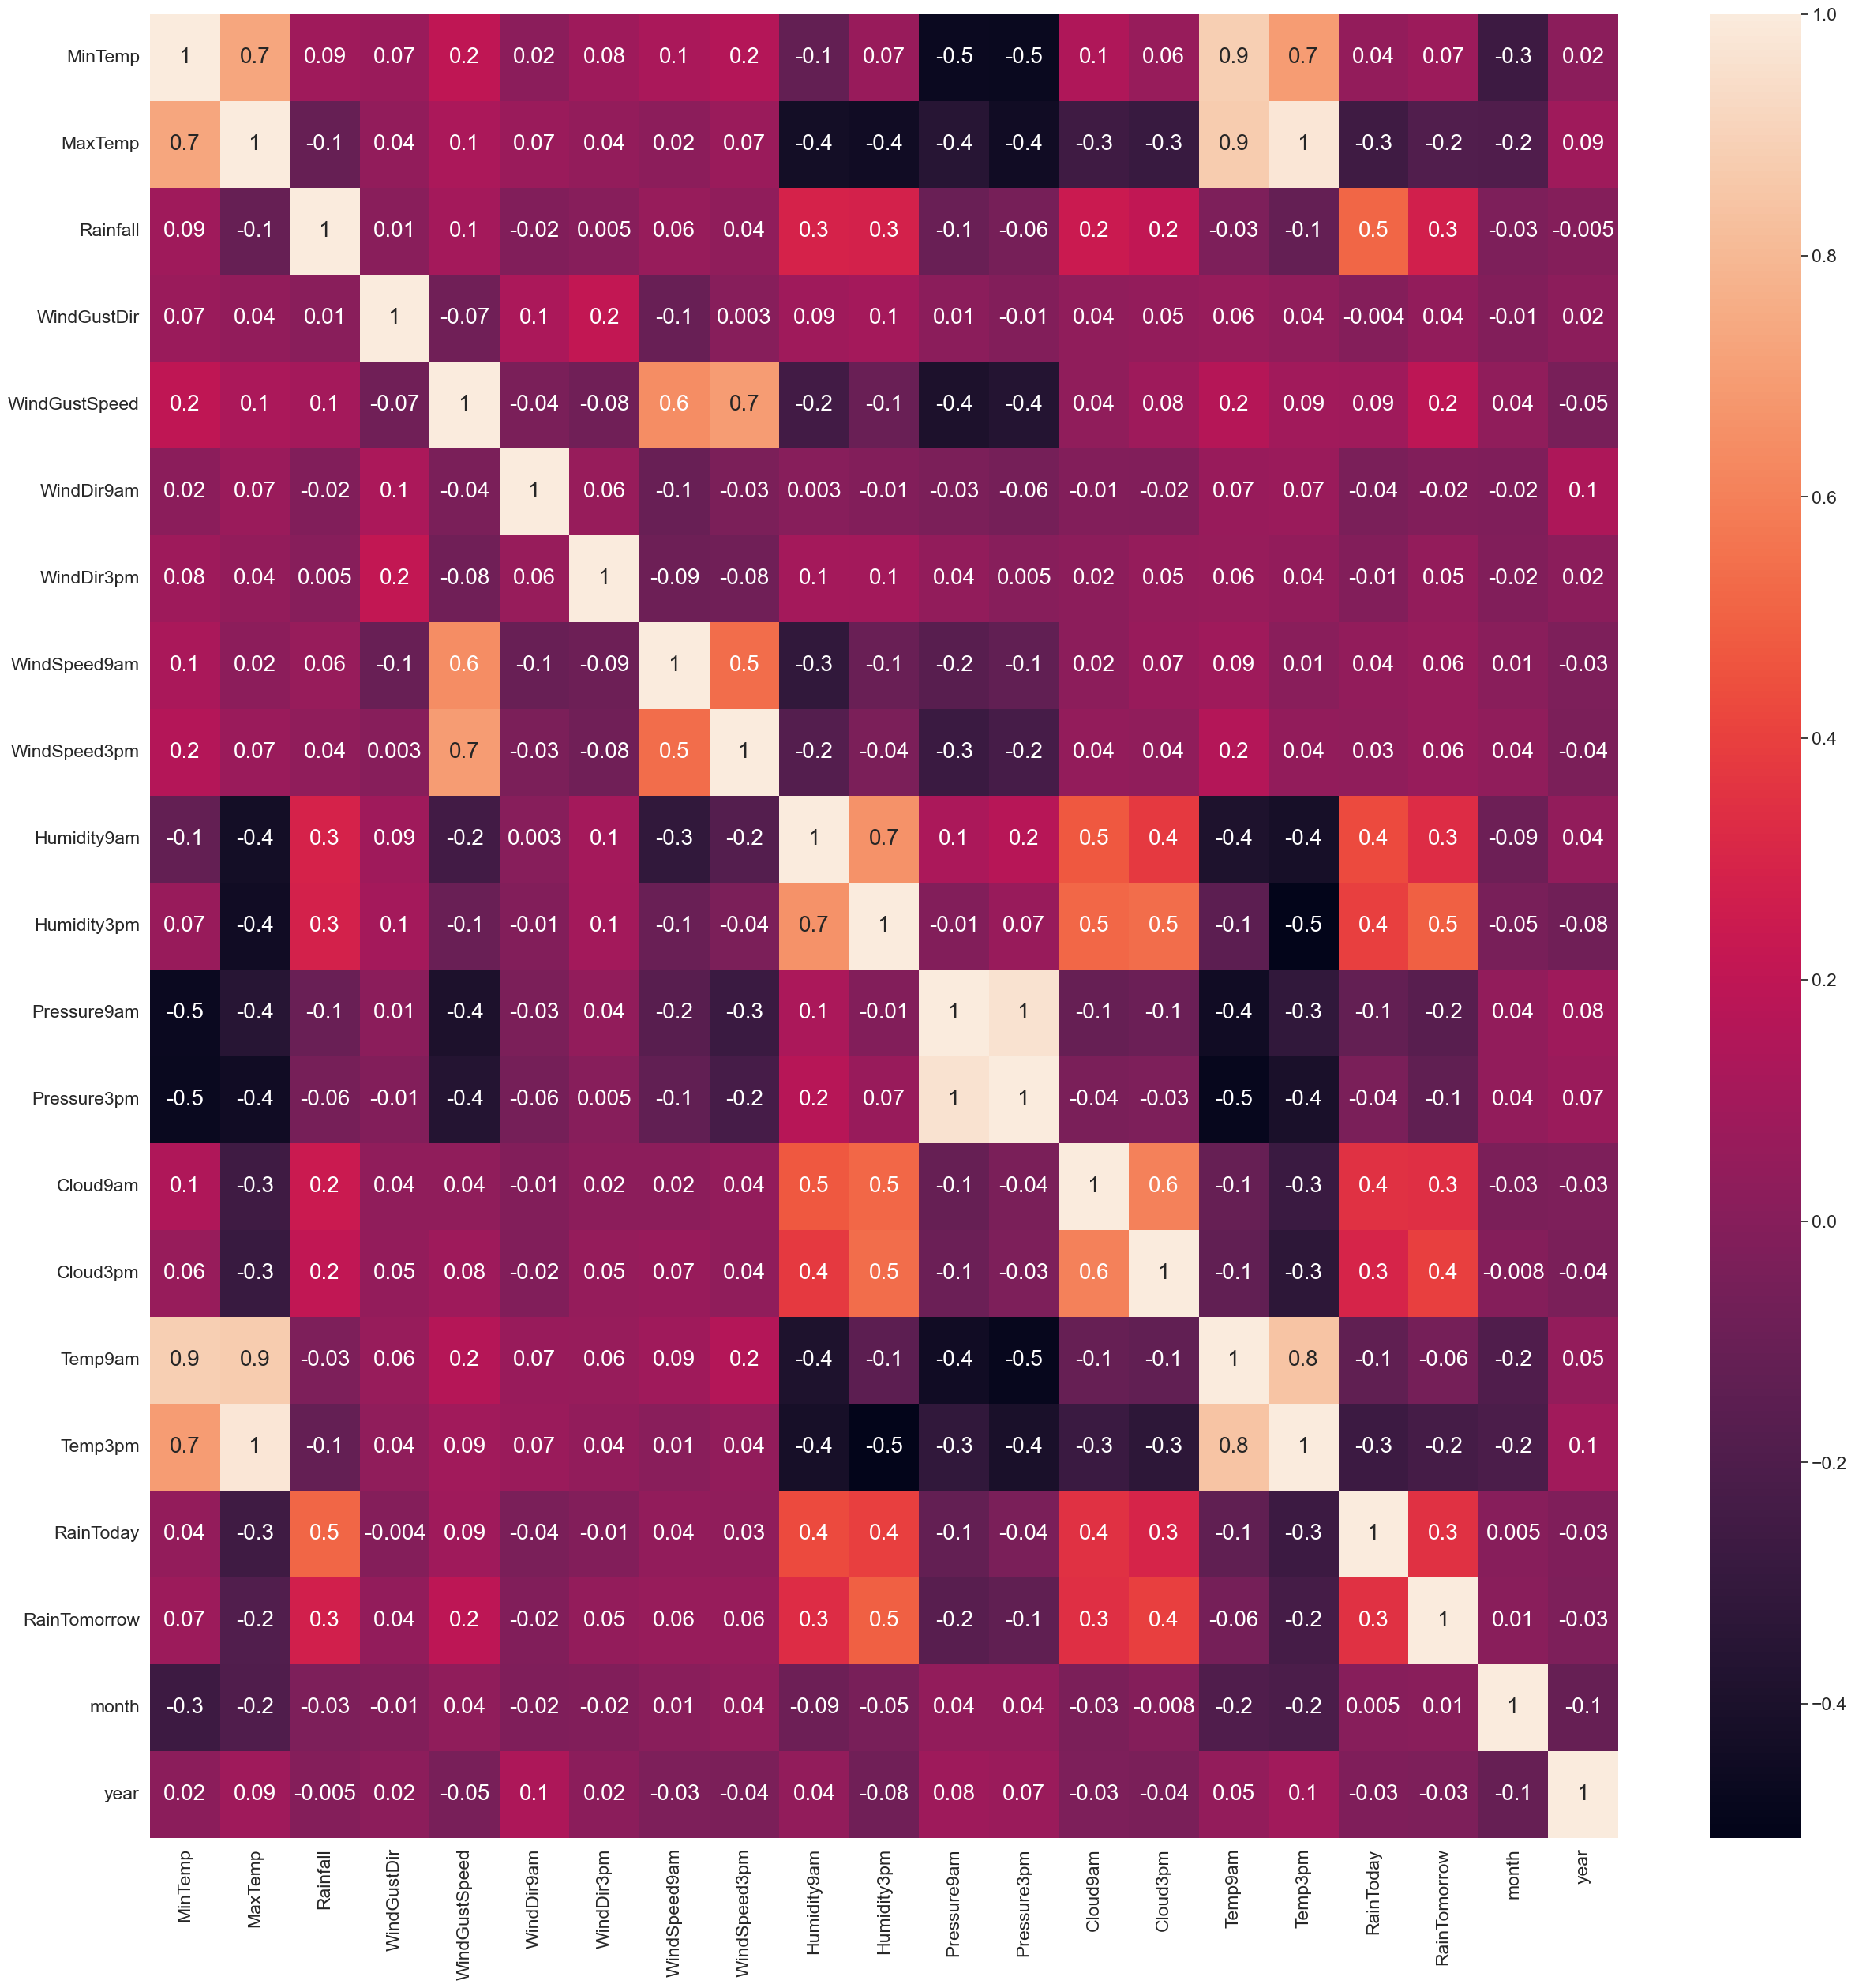

In [33]:
plt.figure(figsize=(30,30))
sns.heatmap(df1.corr(),fmt='.1g',annot=True,annot_kws={'fontsize':20})
sns.set(font_scale=1.5)

In [34]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'month', 'year'],
      dtype='object')

In [35]:
# 'WindGustDir','WindDir9am', 'WindDir3pm','month' are not contributing much as shown above

In [36]:
df = df.drop(['WindGustDir','WindDir9am', 'WindDir3pm'],axis=1)

In [37]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
month            0
year             0
dtype: int64

.

.

.

In [38]:
#  0 = No
#  1 = Yes

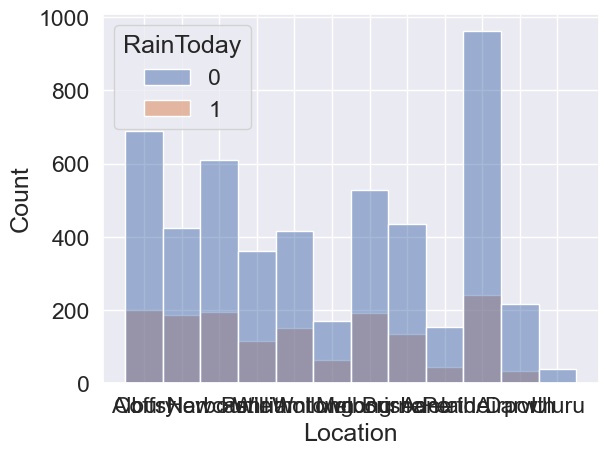

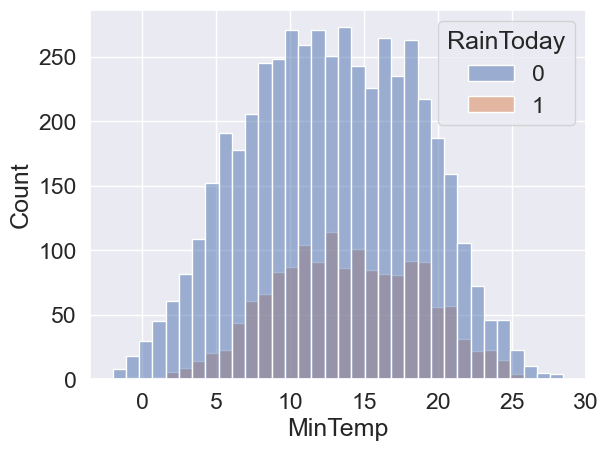

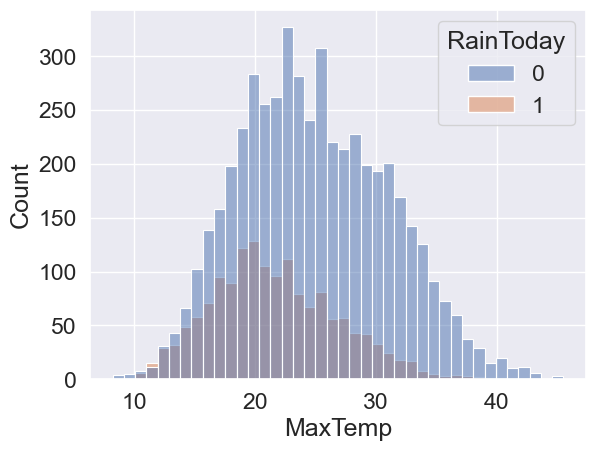

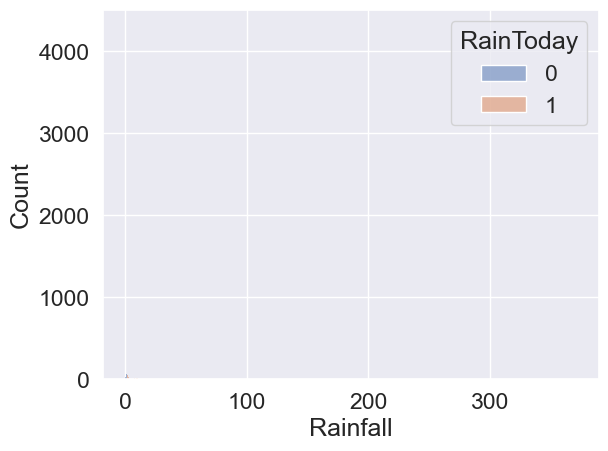

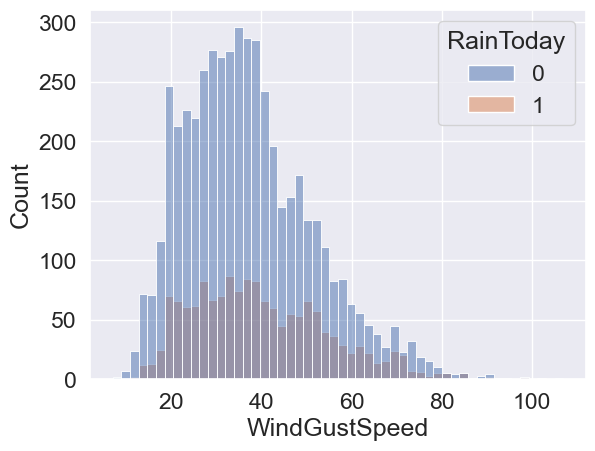

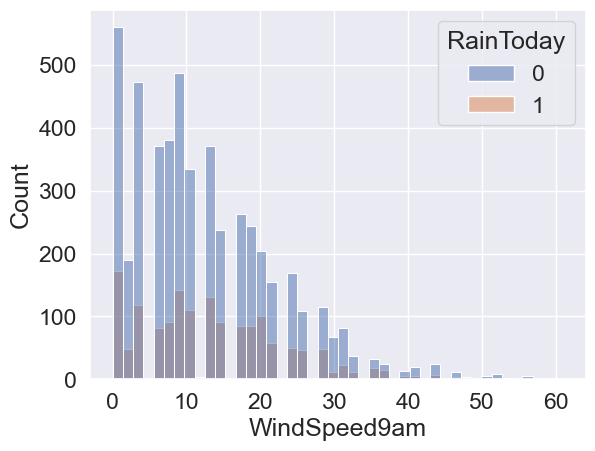

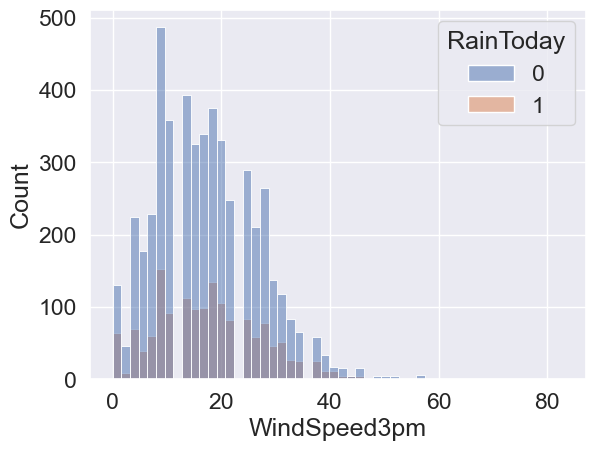

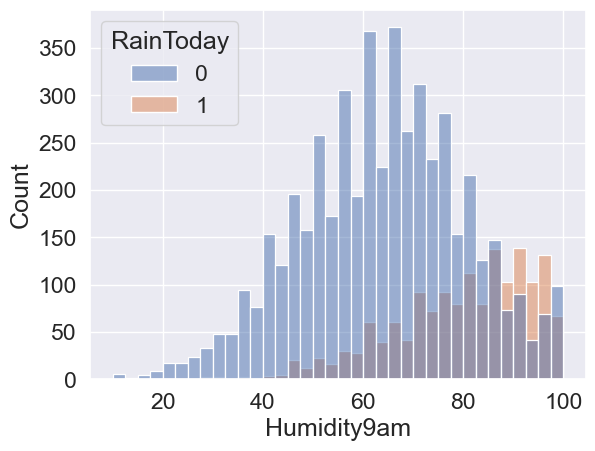

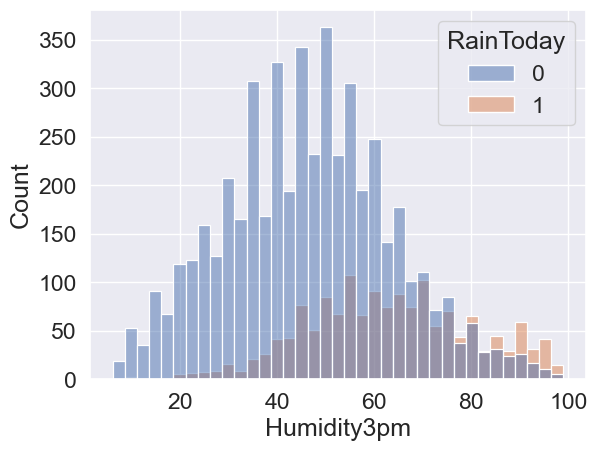

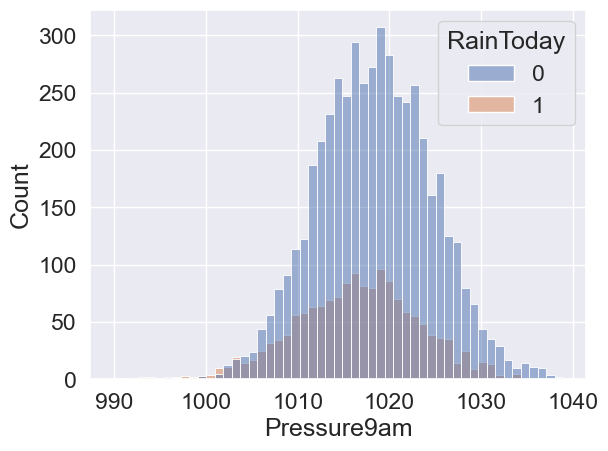

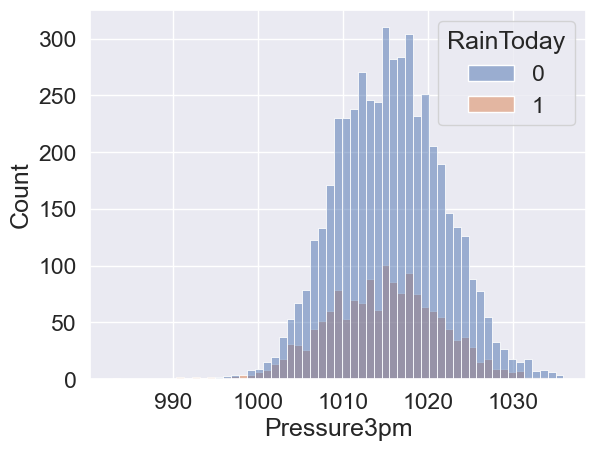

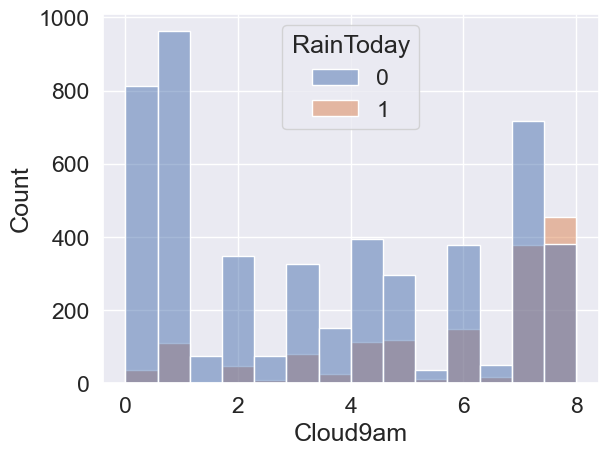

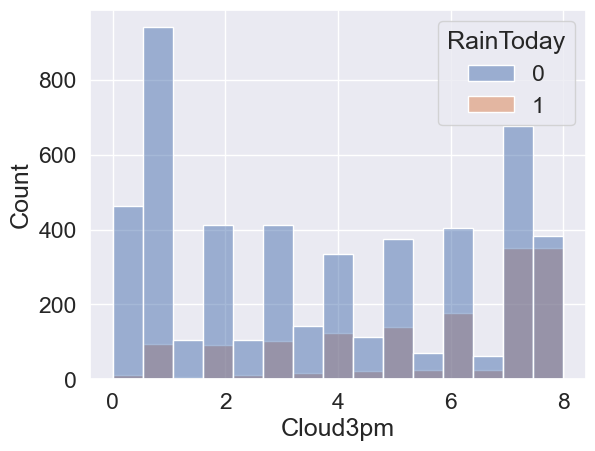

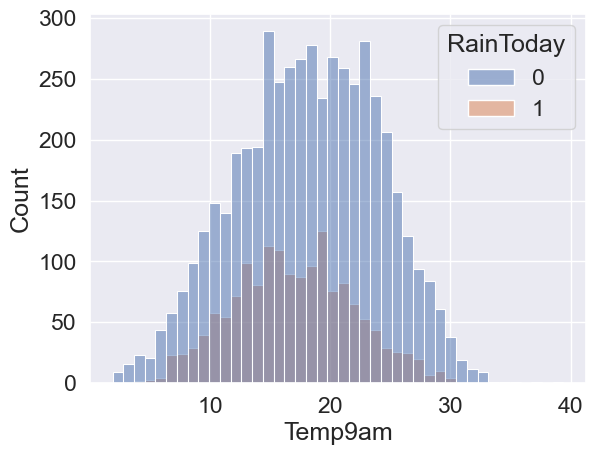

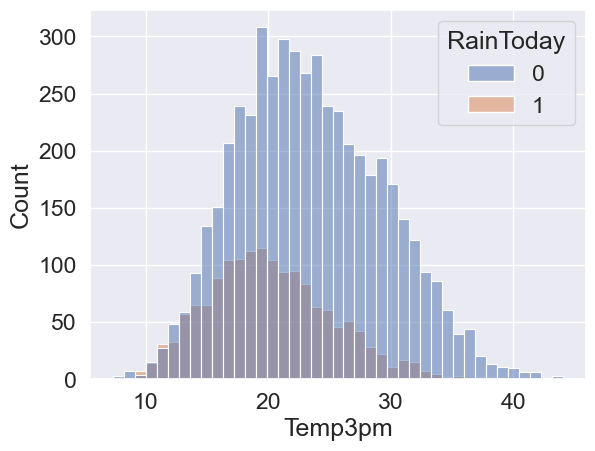

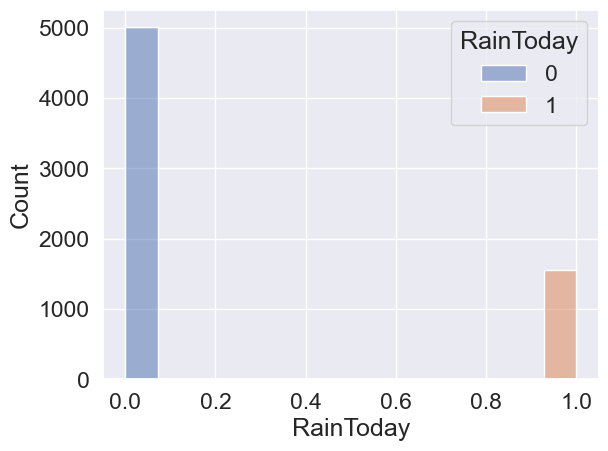

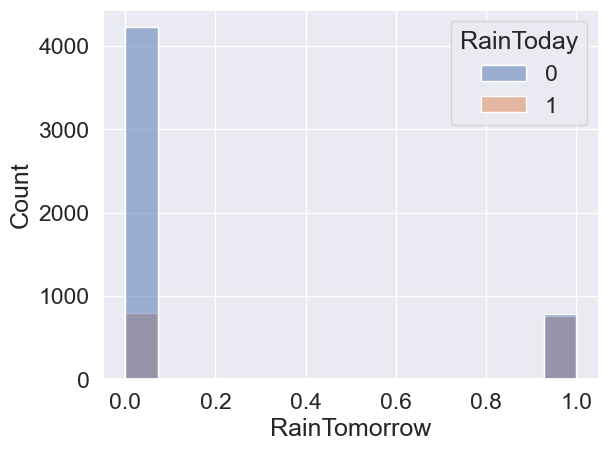

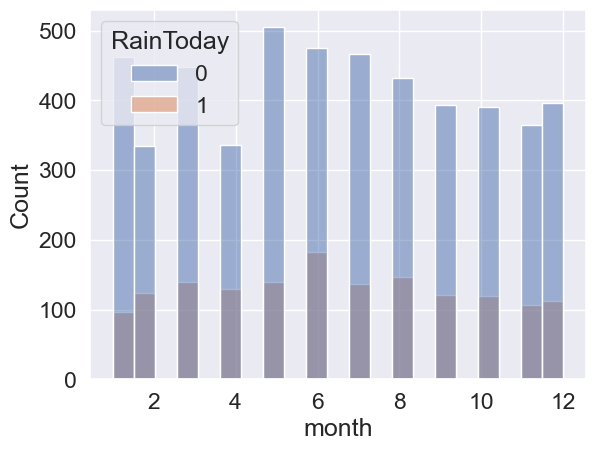

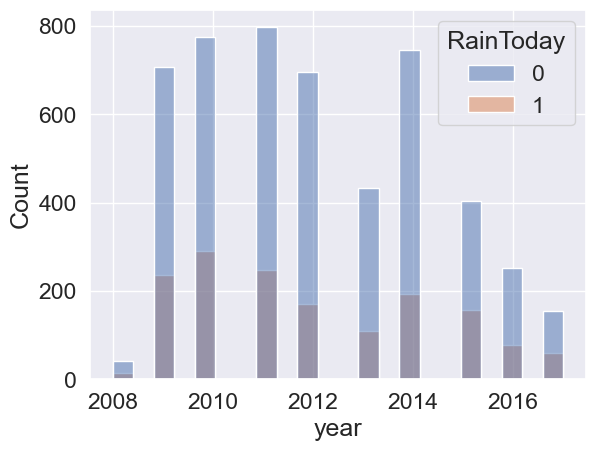

In [39]:
for i in df.columns:
    sns.histplot(data=df,x=i,hue='RainToday')
    plt.show()

In [40]:
df

Location  MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0      Albury     13.4     22.9       0.6           44.0          20.0   
1      Albury      7.4     25.1       0.0           44.0           4.0   
2      Albury     12.9     25.7       0.0           46.0          19.0   
3      Albury      9.2     28.0       0.0           24.0          11.0   
4      Albury     17.5     32.3       1.0           41.0           7.0   
...       ...      ...      ...       ...            ...           ...   
8419    Uluru      3.5     21.8       0.0           31.0          15.0   
8420    Uluru      2.8     23.4       0.0           31.0          13.0   
8421    Uluru      3.6     25.3       0.0           22.0          13.0   
8422    Uluru      5.4     26.9       0.0           37.0           9.0   
8423    Uluru      7.8     27.0       0.0           28.0          13.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0             24.0         71.0         22.0       1007.7       1007.1   
1             22.0         44.0         25.0       1010.6       1007.8   
2             26.0         38.0         30.0       1007.6       1008.7   
3              9.0         45.0         16.0       1017.6       1012.8   
4             20.0         82.0         33.0       1010.8       1006.0   
...            ...          ...          ...          ...          ...   
8419          13.0         59.0         27.0       1024.7       1021.2   
8420          11.0         51.0         24.0       1024.6       1020.3   
8421           9.0         56.0         21.0       1023.5       1019.1   
8422           9.0         53.0         24.0       1021.0       1016.8   
8423           7.0         51.0         24.0       1019.4       1016.5   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  month  \
0          8.0       5.5     16.9     21.8          0             0     12   
1          0.5       0.5     17.2     24.3          0             0     12   
2          1.0       2.0     21.0     23.2          0             0     12   
3          1.0       0.5     18.1     26.5          0             0     12   
4          7.0       8.0     17.8     29.7          0             0     12   
...        ...       ...      ...      ...        ...           ...    ...   
8419       0.5       4.0      9.4     20.9          0             0      6   
8420       2.0       0.5     10.1     22.4          0             0      6   
8421       2.0       1.0     10.9     24.5          0             0      6   
8422       4.0       3.5     12.5     26.1          0             0      6   
8423       3.0       2.0     15.1     26.0          0             0      6   

      year  
0     2008  
1     2008  
2     2008  
3     2008  
4     2008  
...    ...  
8419  2017  
8420  2017  
8421  2017  
8422  2017  
8423  2017  

[6558 rows x 19 columns]

In [41]:
df.groupby(['Location'])['RainToday'].mean()

Location
Adelaide        0.222222
Albury          0.223847
Brisbane        0.235501
CoffsHarbour    0.305419
Darwin          0.132000
Melbourne       0.266297
Newcastle       0.241294
Penrith         0.241597
PerthAirport    0.200997
Uluru           0.000000
Williamtown     0.265845
Wollongong      0.271552
Name: RainToday, dtype: float64

In [42]:
df.groupby(['Location'])['RainTomorrow'].mean()

Location
Adelaide        0.227273
Albury          0.222722
Brisbane        0.235501
CoffsHarbour    0.303777
Darwin          0.128000
Melbourne       0.251040
Newcastle       0.241294
Penrith         0.243697
PerthAirport    0.200997
Uluru           0.000000
Williamtown     0.257042
Wollongong      0.267241
Name: RainTomorrow, dtype: float64

<Axes: xlabel='Cloud3pm', ylabel='count'>

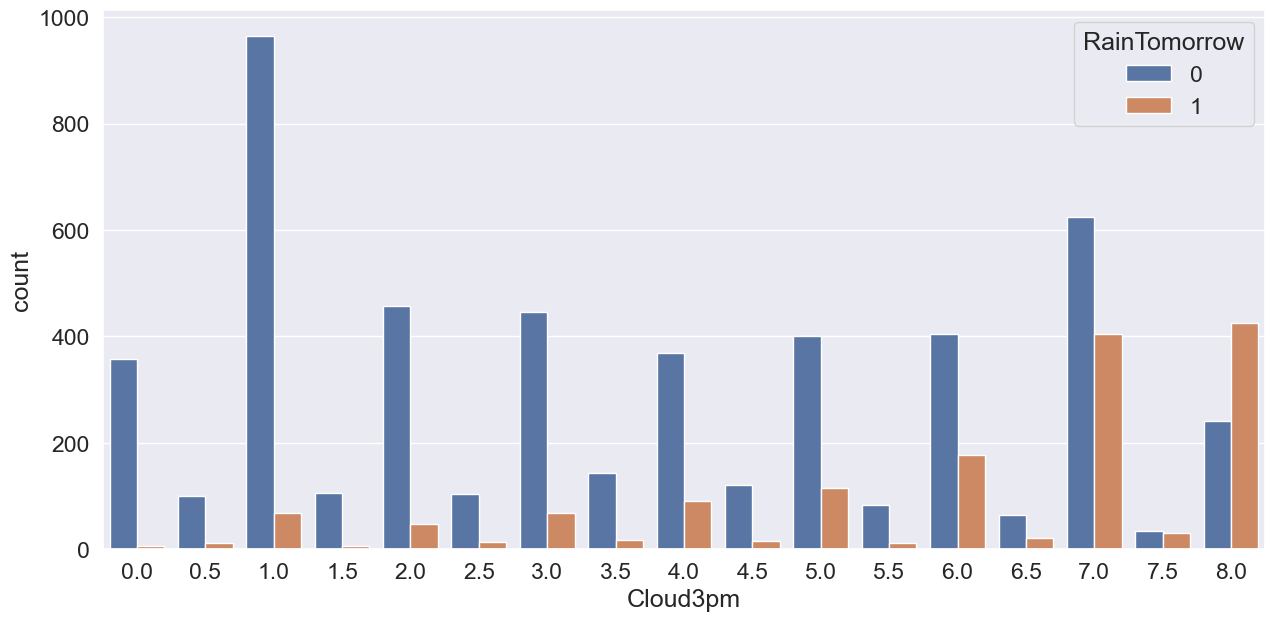

In [43]:
plt.figure(figsize=(15,7))
sns.countplot(x="Cloud3pm",hue='RainTomorrow',data=df)

<Axes: xlabel='Cloud3pm', ylabel='count'>

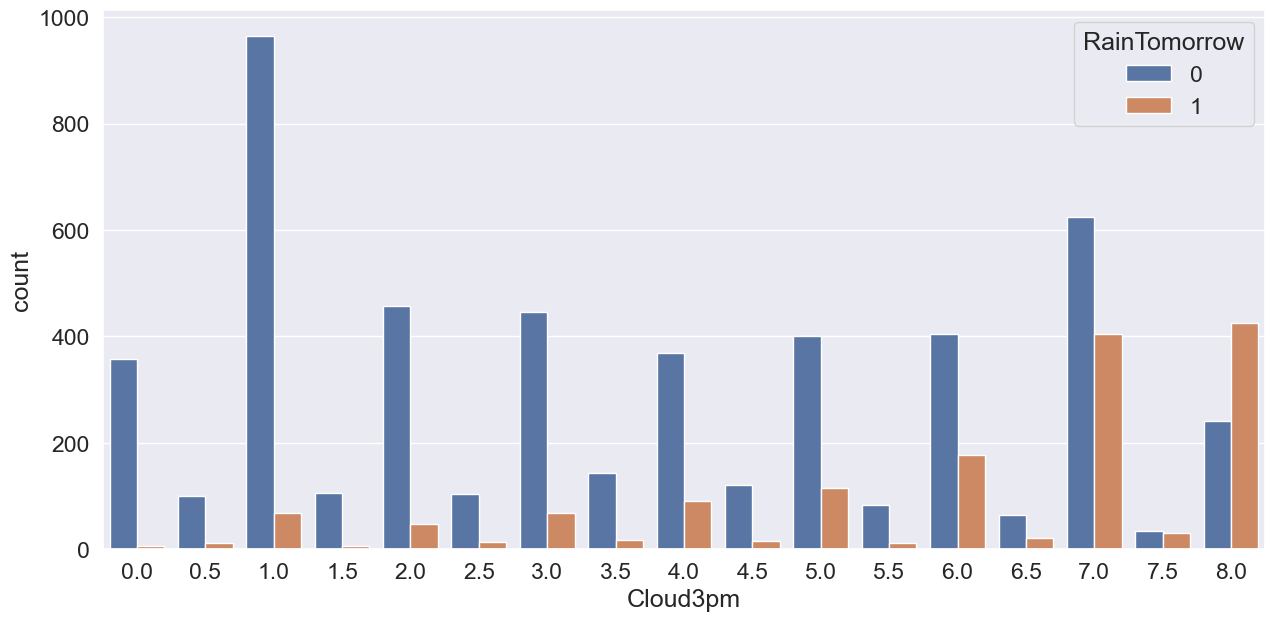

In [44]:
plt.figure(figsize=(15,7))
sns.countplot(x="Cloud3pm",hue='RainTomorrow',data=df)

<Axes: xlabel='Cloud9am', ylabel='count'>

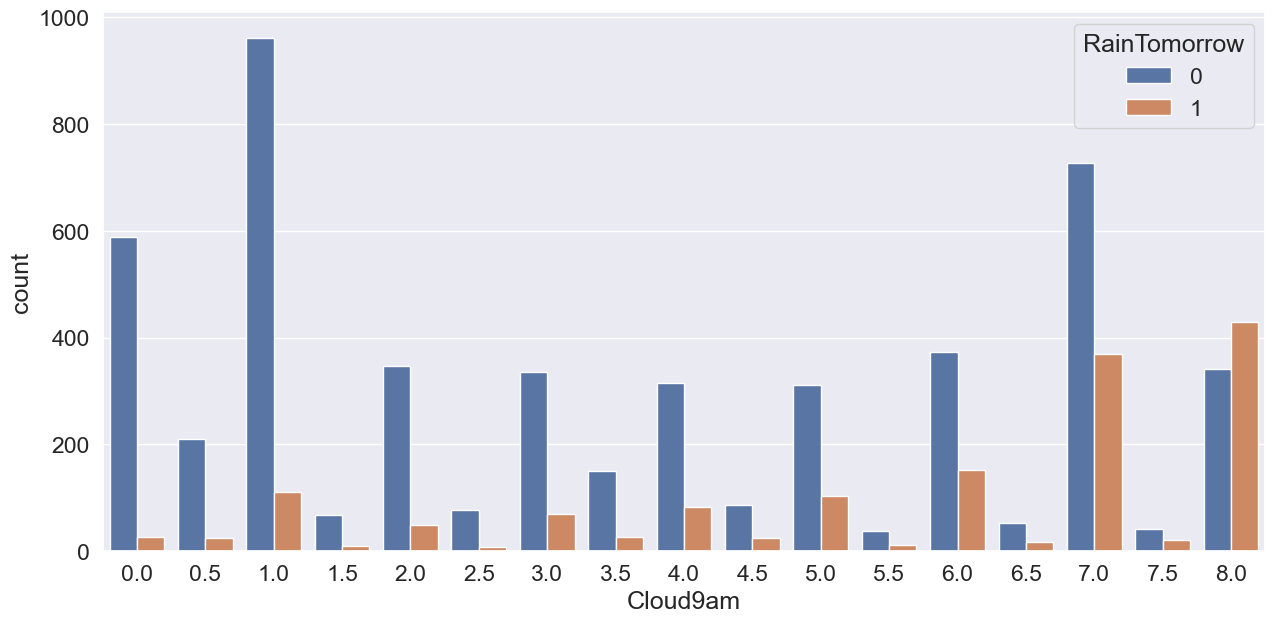

In [45]:
plt.figure(figsize=(15,7))
sns.countplot(x="Cloud9am",hue='RainTomorrow',data=df)

<Axes: xlabel='Cloud9am', ylabel='count'>

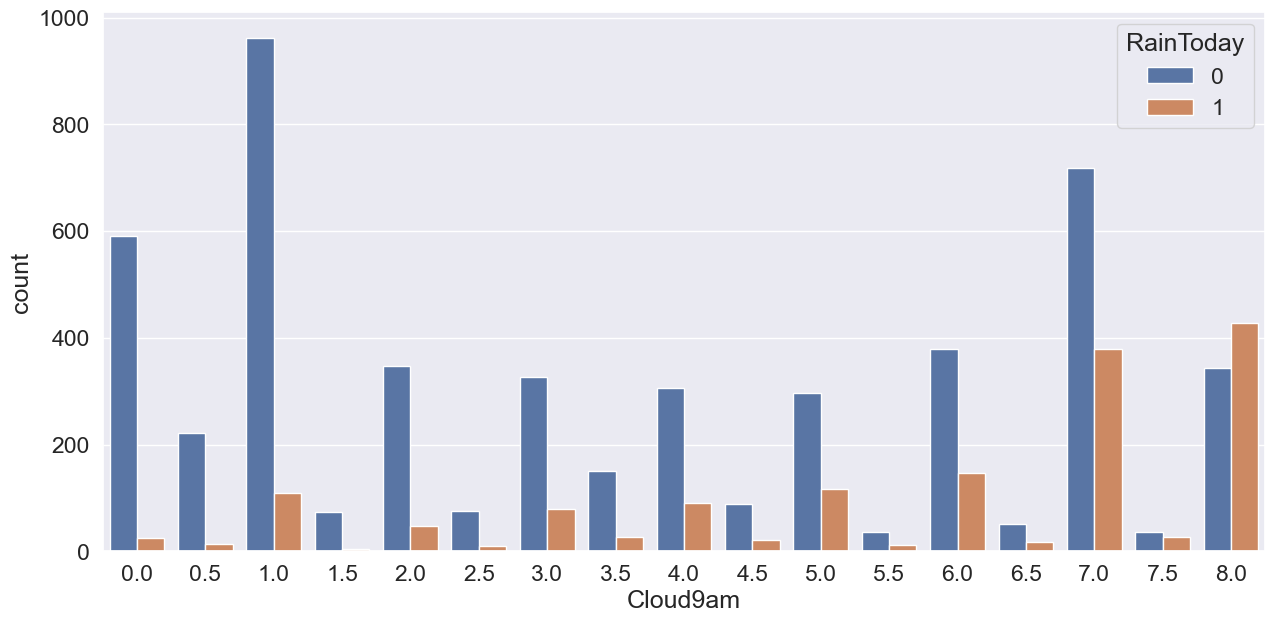

In [46]:
plt.figure(figsize=(15,7))
sns.countplot(x="Cloud9am",hue='RainToday',data=df)

<Axes: xlabel='Location', ylabel='count'>

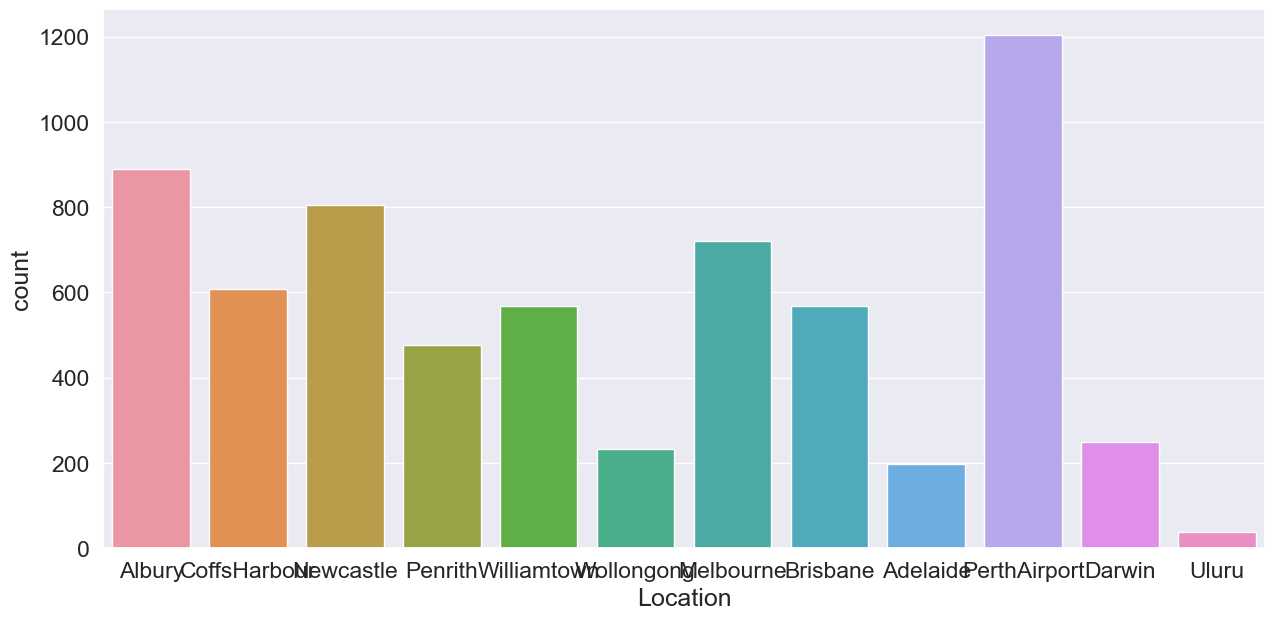

In [47]:
plt.figure(figsize=(15,7))
sns.countplot(x='Location',data=df)

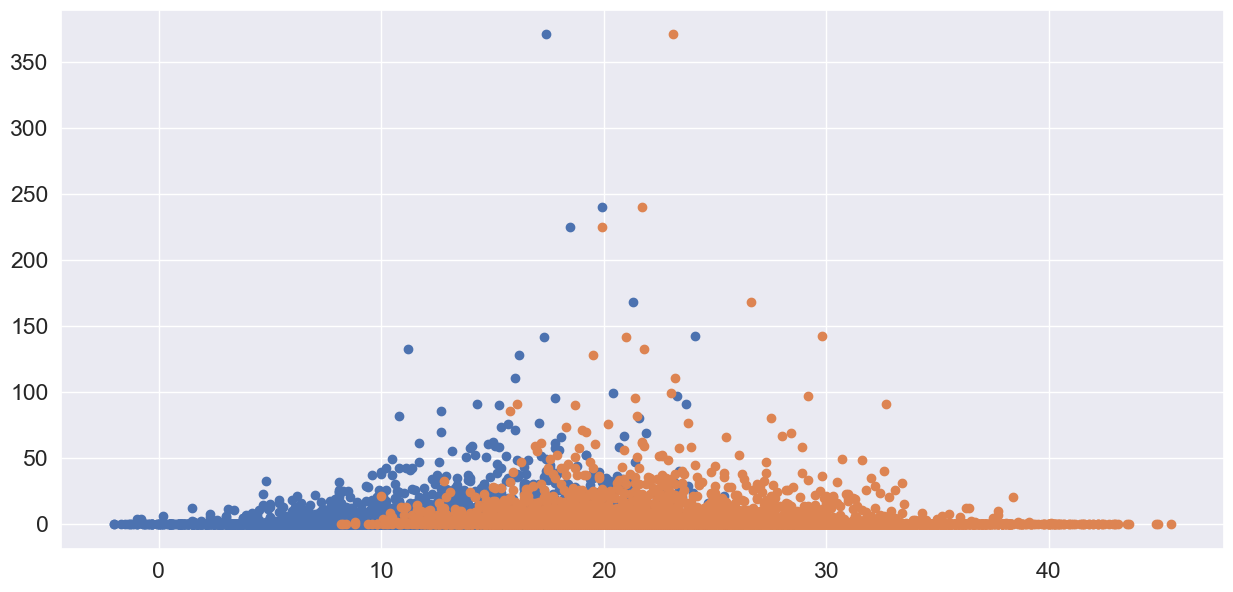

In [48]:
plt.figure(figsize=(15,7))
plt.scatter(df.MinTemp , df.Rainfall)
plt.scatter(df.MaxTemp , df.Rainfall)
plt.show()

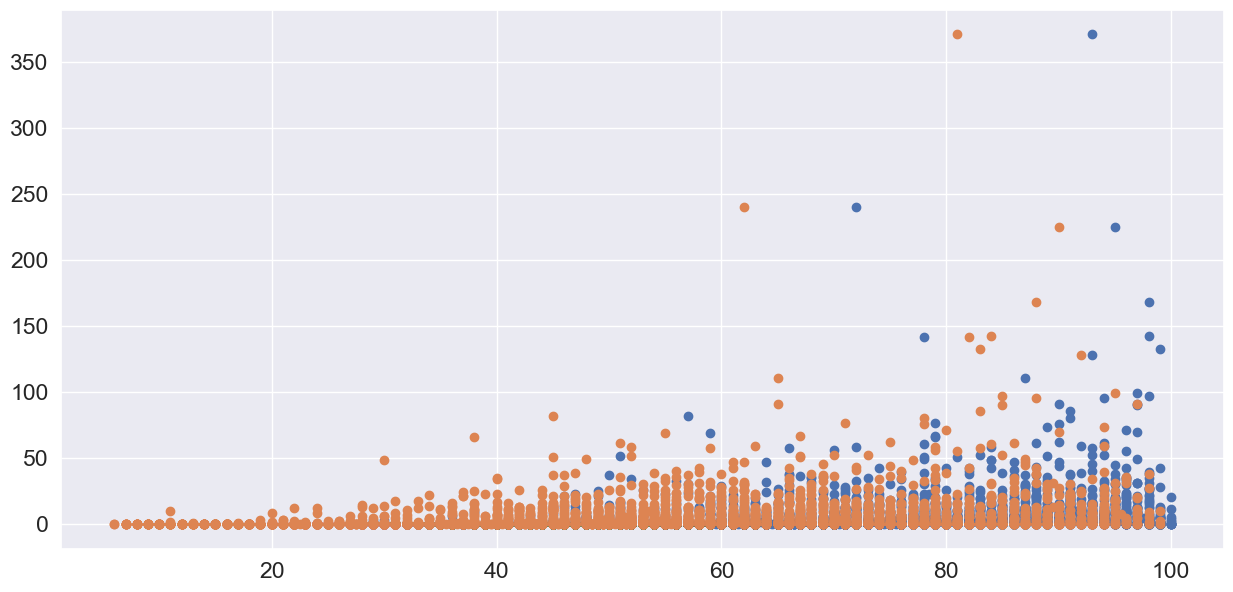

In [49]:
plt.figure(figsize=(15,7))
plt.scatter(df.Humidity9am , df.Rainfall)
plt.scatter(df.Humidity3pm , df.Rainfall)
plt.show()

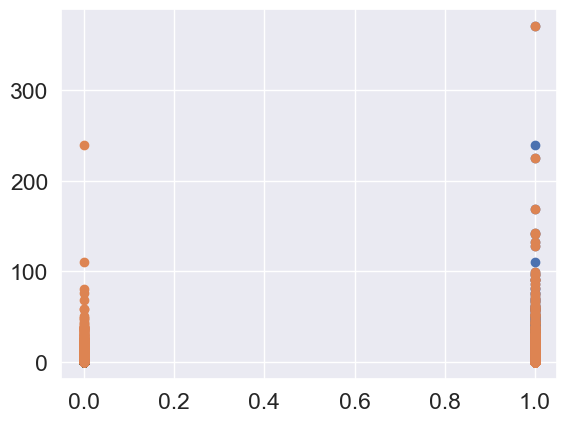

In [50]:
plt.scatter(df.RainToday , df.Rainfall)
plt.scatter(df.RainTomorrow , df.Rainfall)
plt.show()

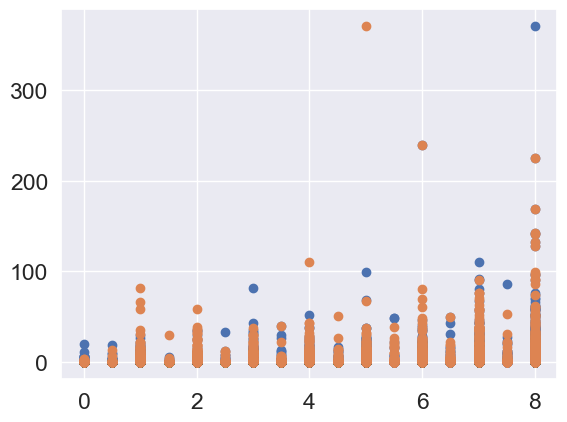

In [51]:
plt.scatter(df.Cloud9am , df.Rainfall)
plt.scatter(df.Cloud3pm , df.Rainfall)
plt.show()

<Axes: xlabel='month', ylabel='Rainfall'>

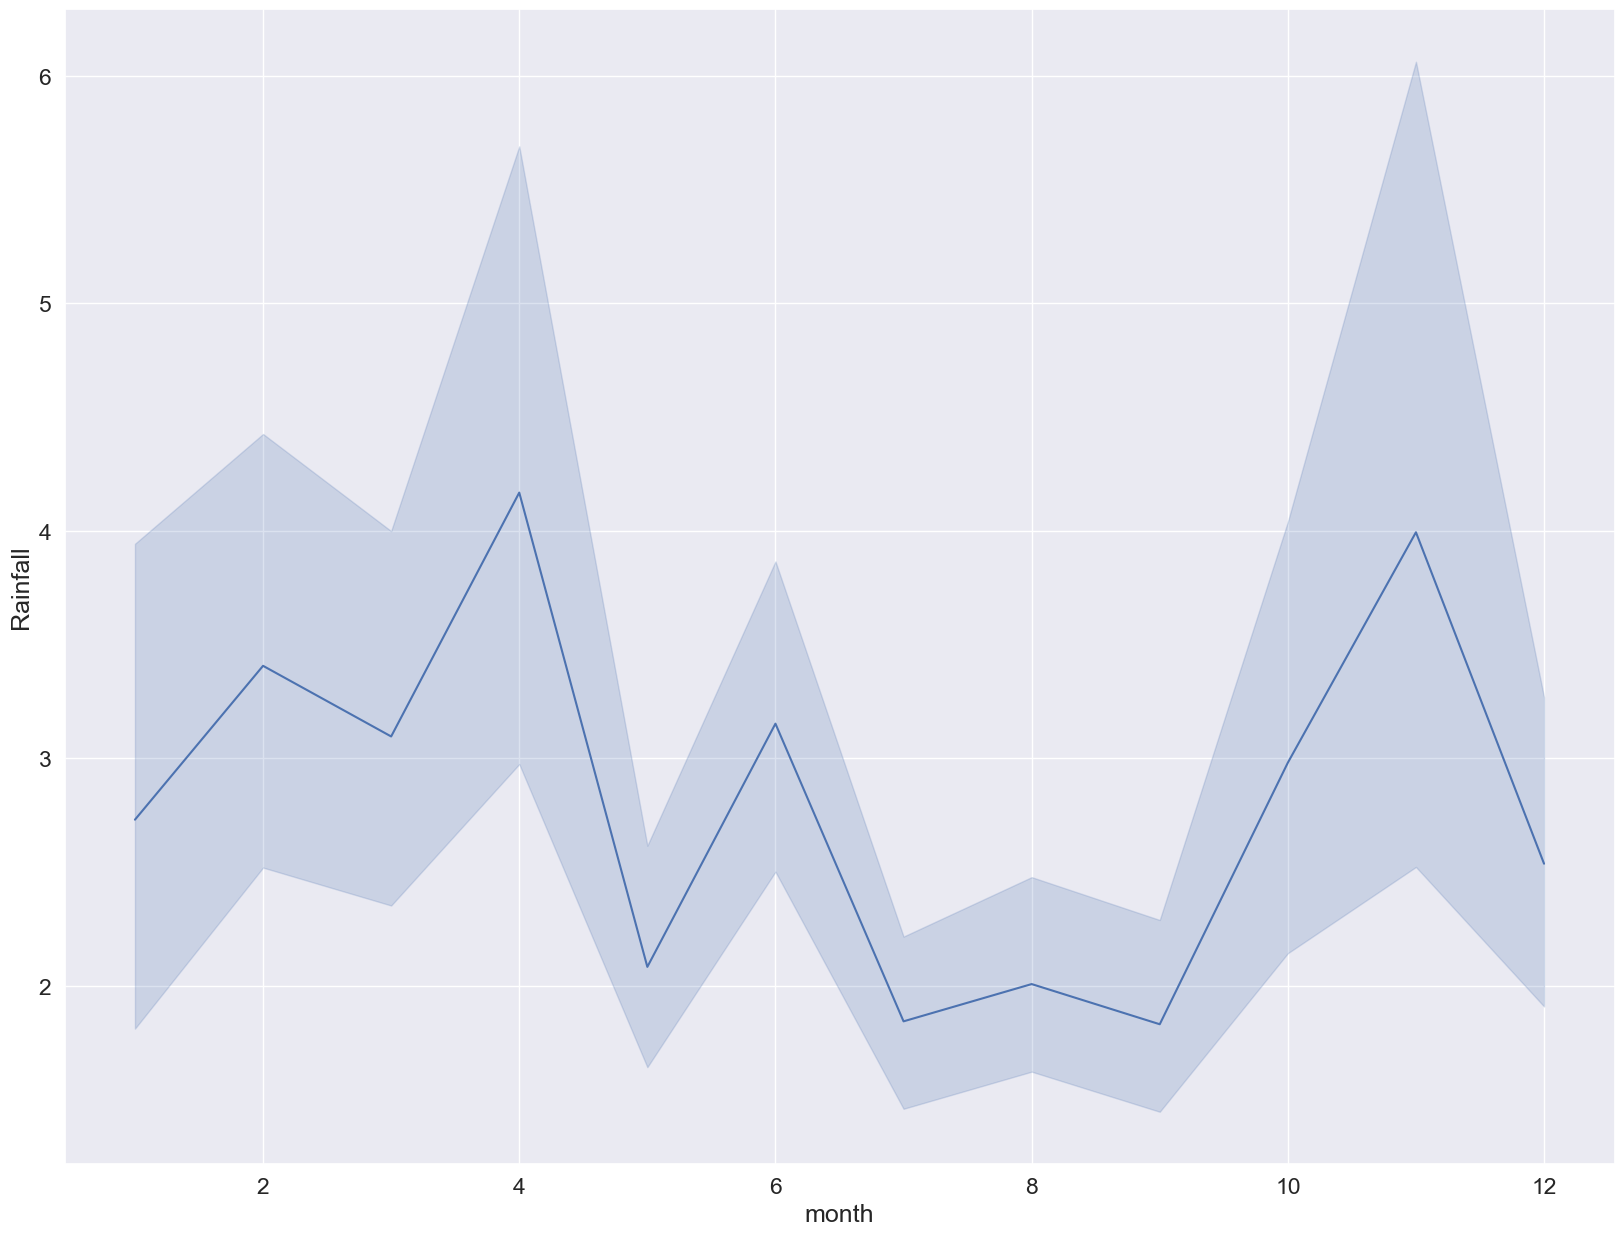

In [52]:
plt.figure(figsize=(20,15))
sns.lineplot(x='month',y='Rainfall',data=df)

<Axes: xlabel='year', ylabel='Rainfall'>

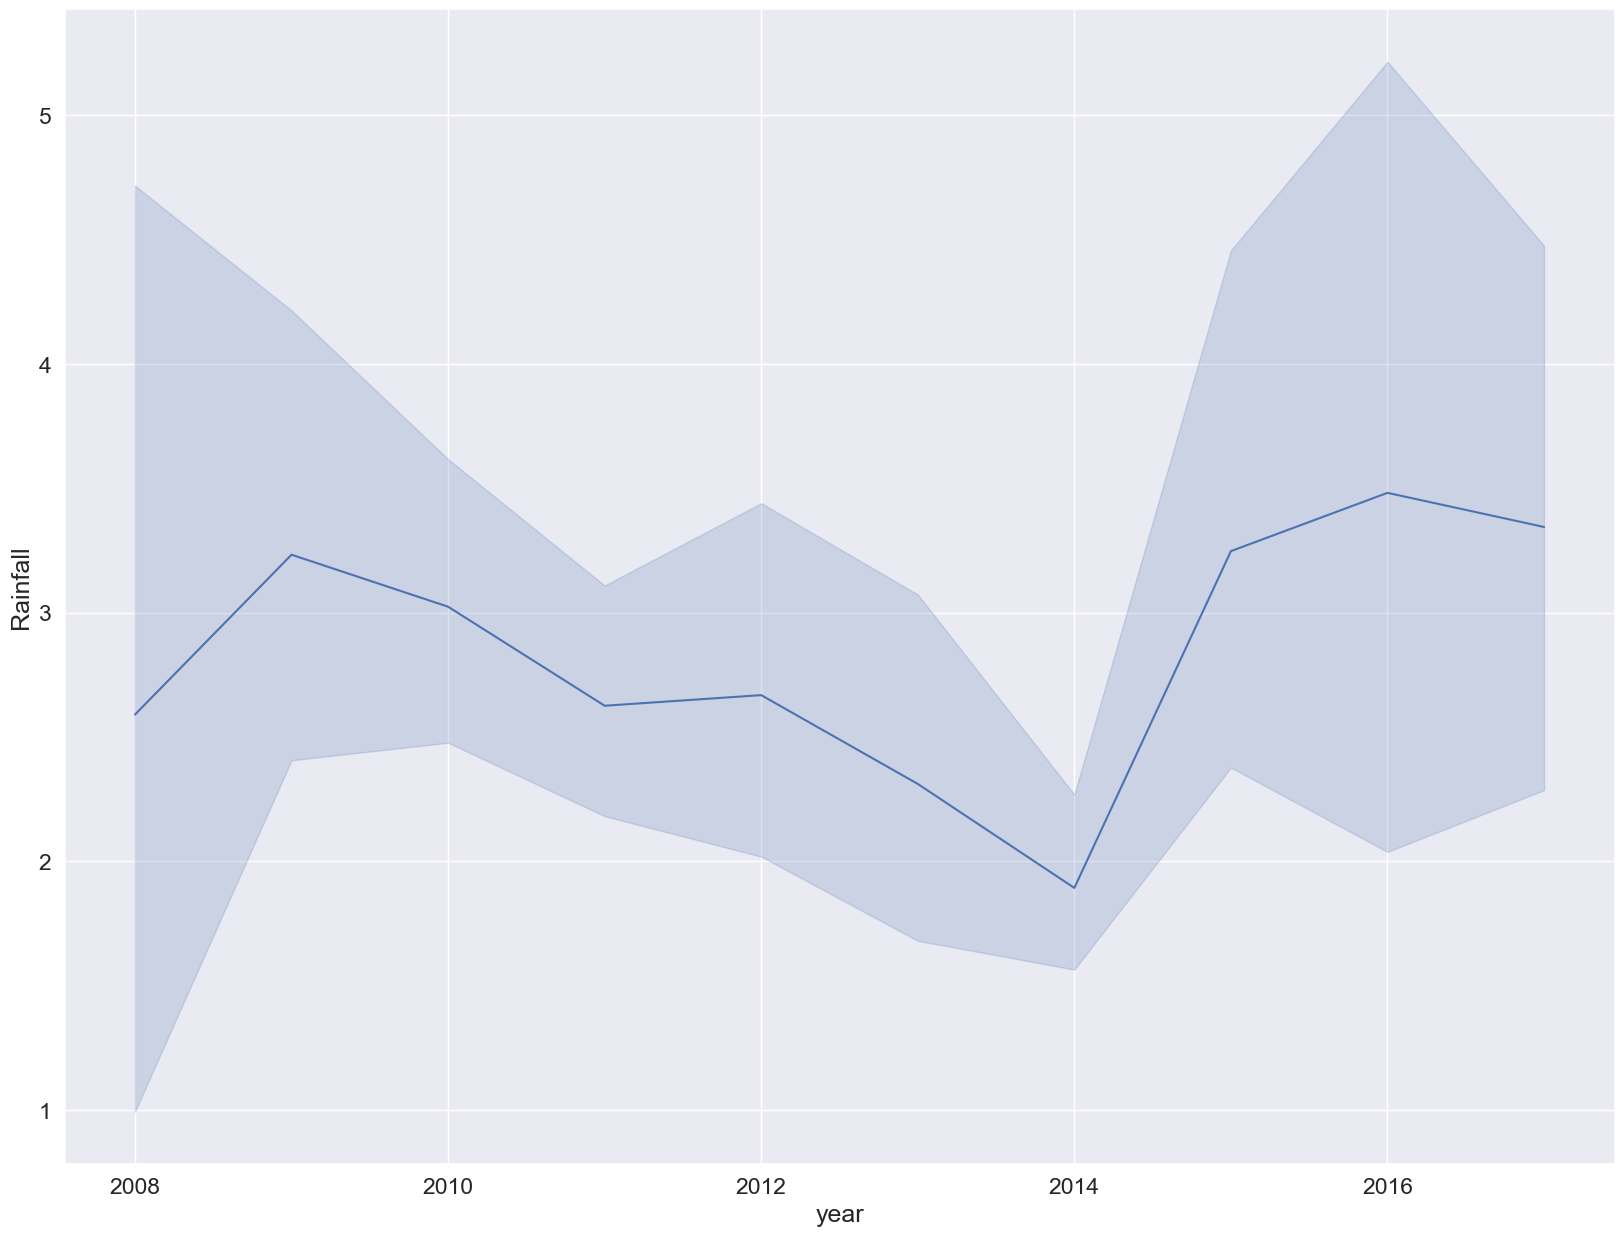

In [53]:
plt.figure(figsize=(20,15))
sns.lineplot(x='year',y='Rainfall',data=df)

In [54]:
df['Location'] = pd.factorize(df['Location'])[0]

In [55]:
sns.set(font_scale=3)

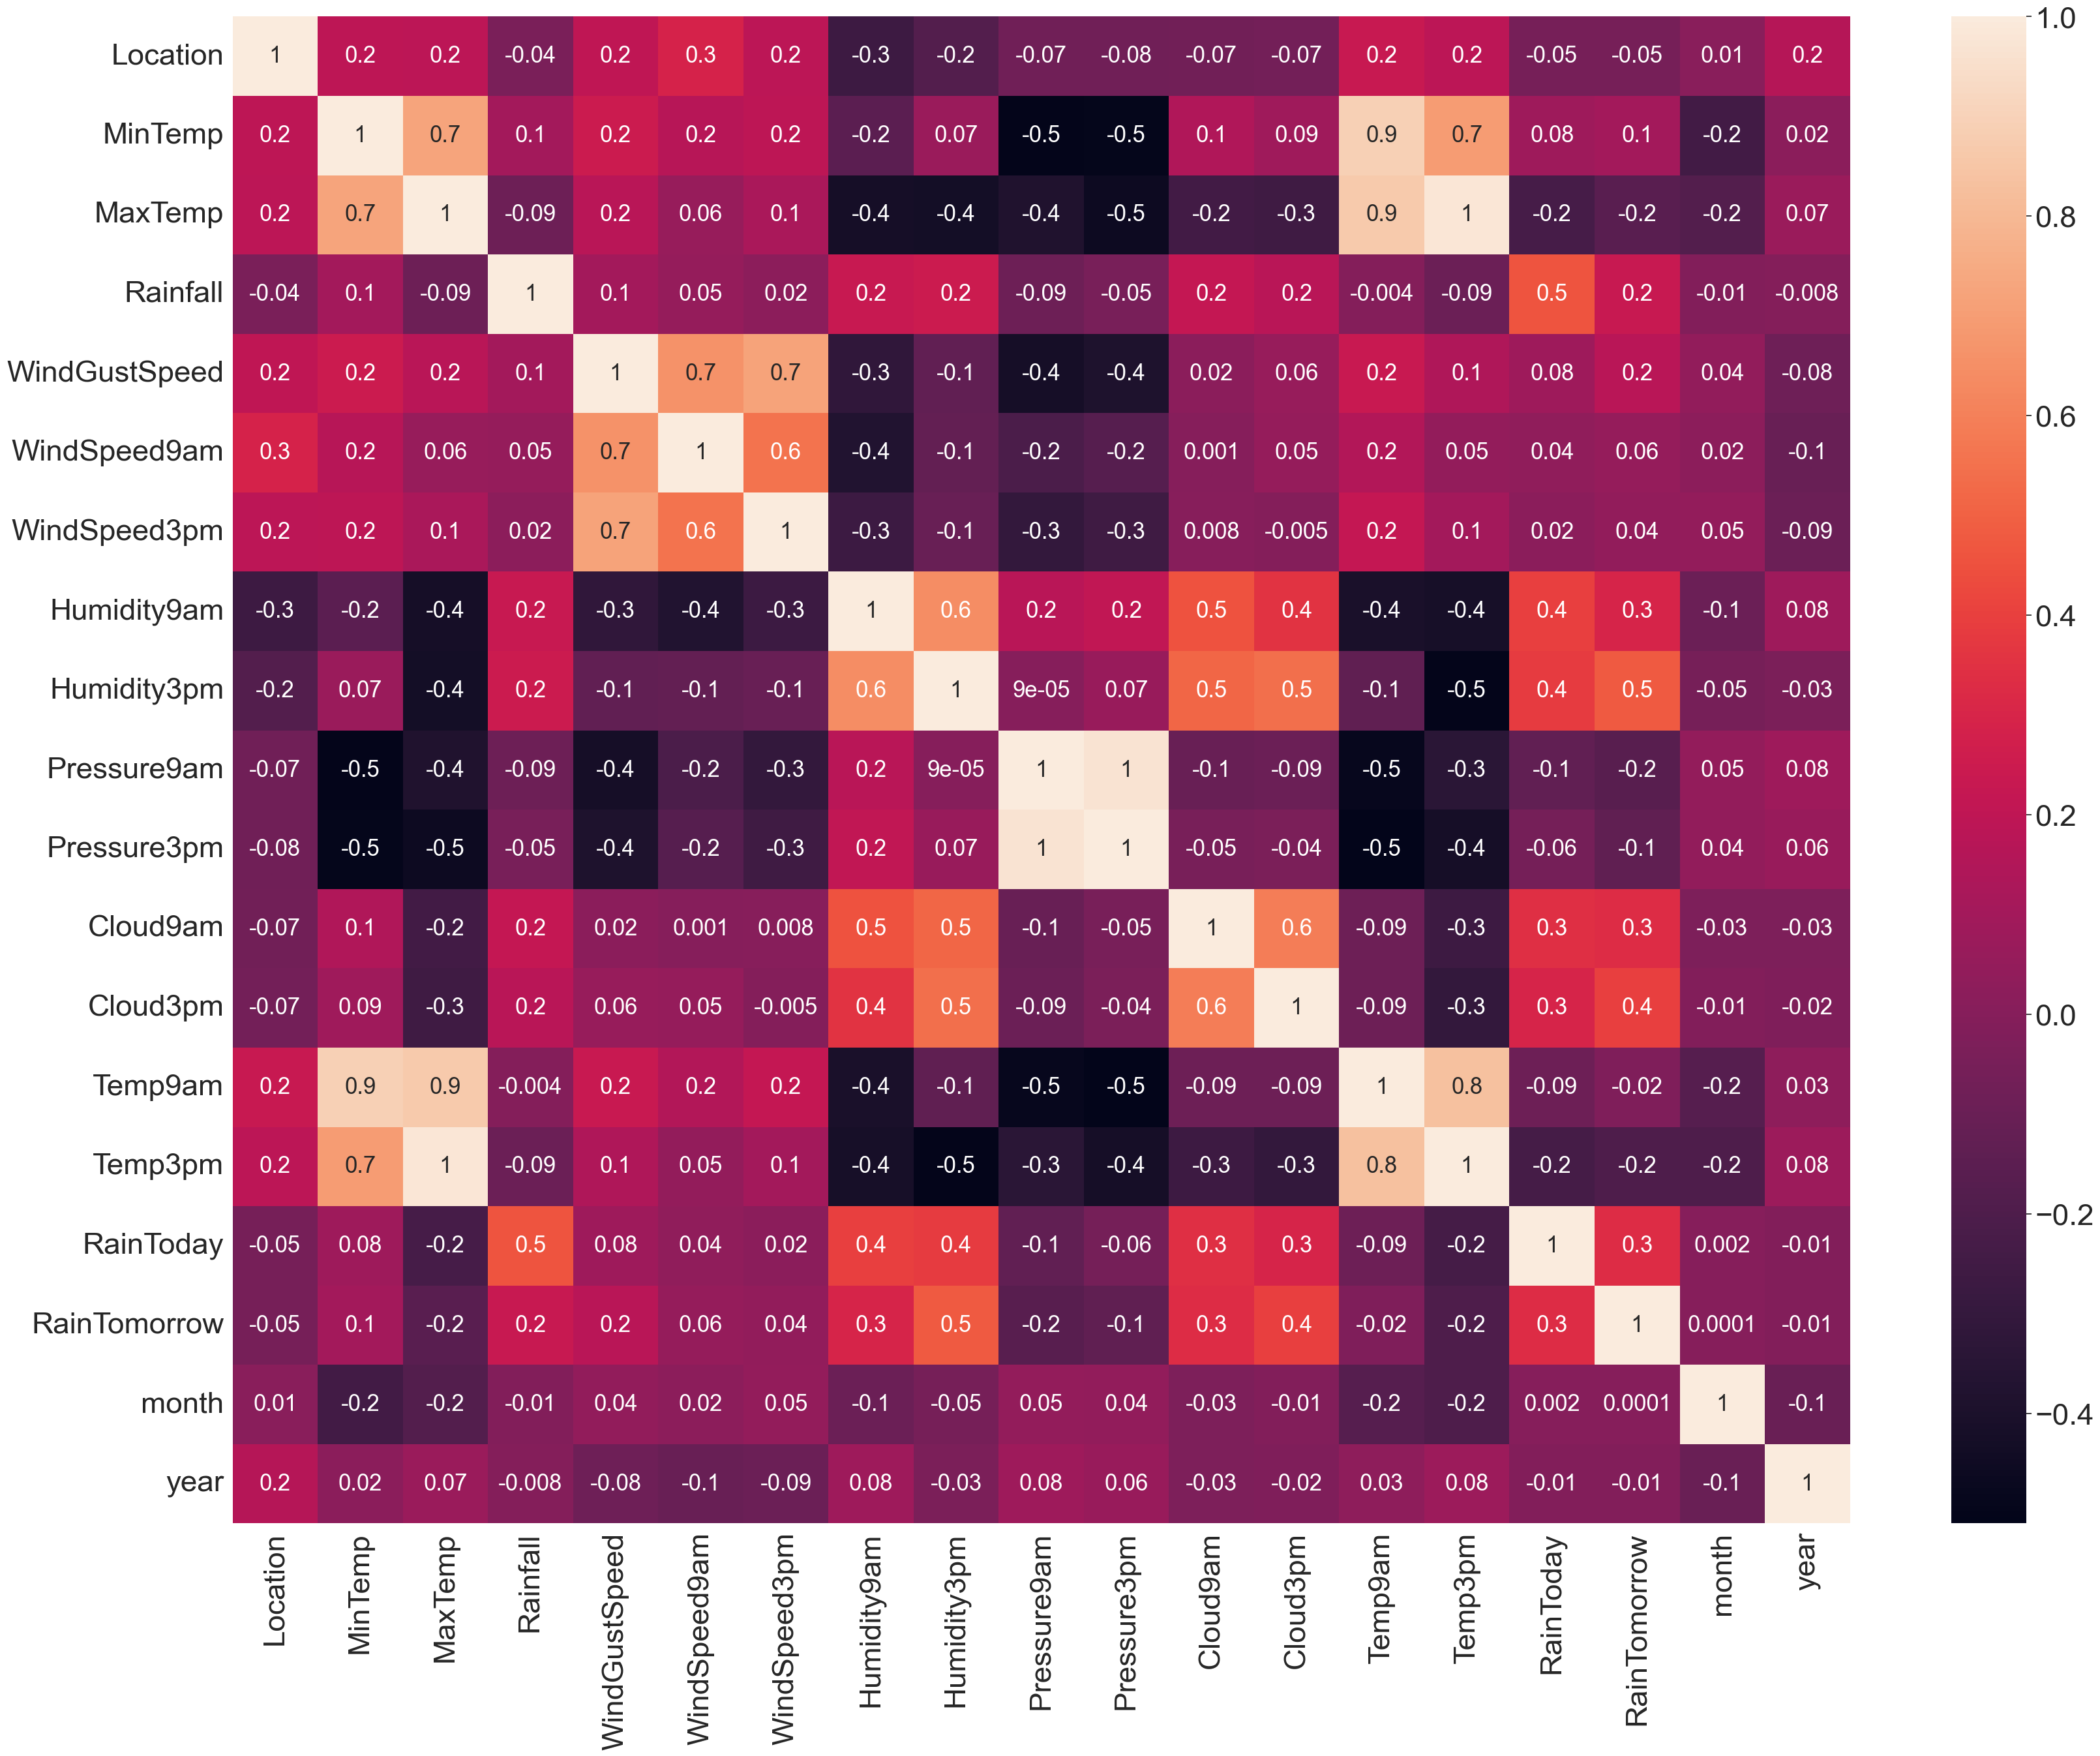

In [56]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),fmt='.1g',annot=True,annot_kws={'fontsize':25})
sns.set(font_scale=3)

In [57]:
df.groupby(['month'])['RainToday'].mean()

month
1     0.171735
2     0.270742
3     0.236797
4     0.278970
5     0.215839
6     0.278116
7     0.227197
8     0.252595
9     0.235409
10    0.234834
11    0.225053
12    0.220039
Name: RainToday, dtype: float64

In [58]:
df.groupby(['month'])['RainTomorrow'].mean()

month
1     0.169946
2     0.259825
3     0.241908
4     0.272532
5     0.220497
6     0.275076
7     0.223881
8     0.245675
9     0.235409
10    0.234834
11    0.214437
12    0.216110
Name: RainTomorrow, dtype: float64

In [59]:
df.groupby(['month'])['Rainfall'].mean()

month
1     2.730590
2     3.406987
3     3.096422
4     4.168455
5     2.083540
6     3.152736
7     1.844113
8     2.007958
9     1.831323
10    2.981213
11    3.994055
12    2.537132
Name: Rainfall, dtype: float64

In [60]:
# rainfall should be dependent on month as there are seasons in every country and the probability of rain today/tommorow is higher in rainy season rather than summer

In [61]:
season_aus = {
    1:3,
    2:3,
    3:4,
    4:4,
    5:4,
    6:0,
    7:0,
    8:0,
    9:2,
    10:2,
    11:2,
    12:3
}

df['season'] = df['month'].apply(lambda x: season_aus[x])

# in austrailia
# december to february is summer   3
# March to May is Autumn           4
# june to august is winter         0
# september to november is spring  2

In [62]:
df.groupby(['season'])['RainToday'].mean()

season
0    0.253399
2    0.231952
3    0.217562
4    0.240424
Name: RainToday, dtype: float64

In [63]:
df.groupby(['season'])['RainTomorrow'].mean()

season
0    0.249048
2    0.228610
3    0.212320
4    0.242192
Name: RainTomorrow, dtype: float64

In [64]:
df

Location  MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0            0     13.4     22.9       0.6           44.0          20.0   
1            0      7.4     25.1       0.0           44.0           4.0   
2            0     12.9     25.7       0.0           46.0          19.0   
3            0      9.2     28.0       0.0           24.0          11.0   
4            0     17.5     32.3       1.0           41.0           7.0   
...        ...      ...      ...       ...            ...           ...   
8419        11      3.5     21.8       0.0           31.0          15.0   
8420        11      2.8     23.4       0.0           31.0          13.0   
8421        11      3.6     25.3       0.0           22.0          13.0   
8422        11      5.4     26.9       0.0           37.0           9.0   
8423        11      7.8     27.0       0.0           28.0          13.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0             24.0         71.0         22.0       1007.7       1007.1   
1             22.0         44.0         25.0       1010.6       1007.8   
2             26.0         38.0         30.0       1007.6       1008.7   
3              9.0         45.0         16.0       1017.6       1012.8   
4             20.0         82.0         33.0       1010.8       1006.0   
...            ...          ...          ...          ...          ...   
8419          13.0         59.0         27.0       1024.7       1021.2   
8420          11.0         51.0         24.0       1024.6       1020.3   
8421           9.0         56.0         21.0       1023.5       1019.1   
8422           9.0         53.0         24.0       1021.0       1016.8   
8423           7.0         51.0         24.0       1019.4       1016.5   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  month  \
0          8.0       5.5     16.9     21.8          0             0     12   
1          0.5       0.5     17.2     24.3          0             0     12   
2          1.0       2.0     21.0     23.2          0             0     12   
3          1.0       0.5     18.1     26.5          0             0     12   
4          7.0       8.0     17.8     29.7          0             0     12   
...        ...       ...      ...      ...        ...           ...    ...   
8419       0.5       4.0      9.4     20.9          0             0      6   
8420       2.0       0.5     10.1     22.4          0             0      6   
8421       2.0       1.0     10.9     24.5          0             0      6   
8422       4.0       3.5     12.5     26.1          0             0      6   
8423       3.0       2.0     15.1     26.0          0             0      6   

      year  season  
0     2008       3  
1     2008       3  
2     2008       3  
3     2008       3  
4     2008       3  
...    ...     ...  
8419  2017       0  
8420  2017       0  
8421  2017       0  
8422  2017       0  
8423  2017       0  

[6558 rows x 20 columns]

In [65]:
sns.set(font_scale=1)

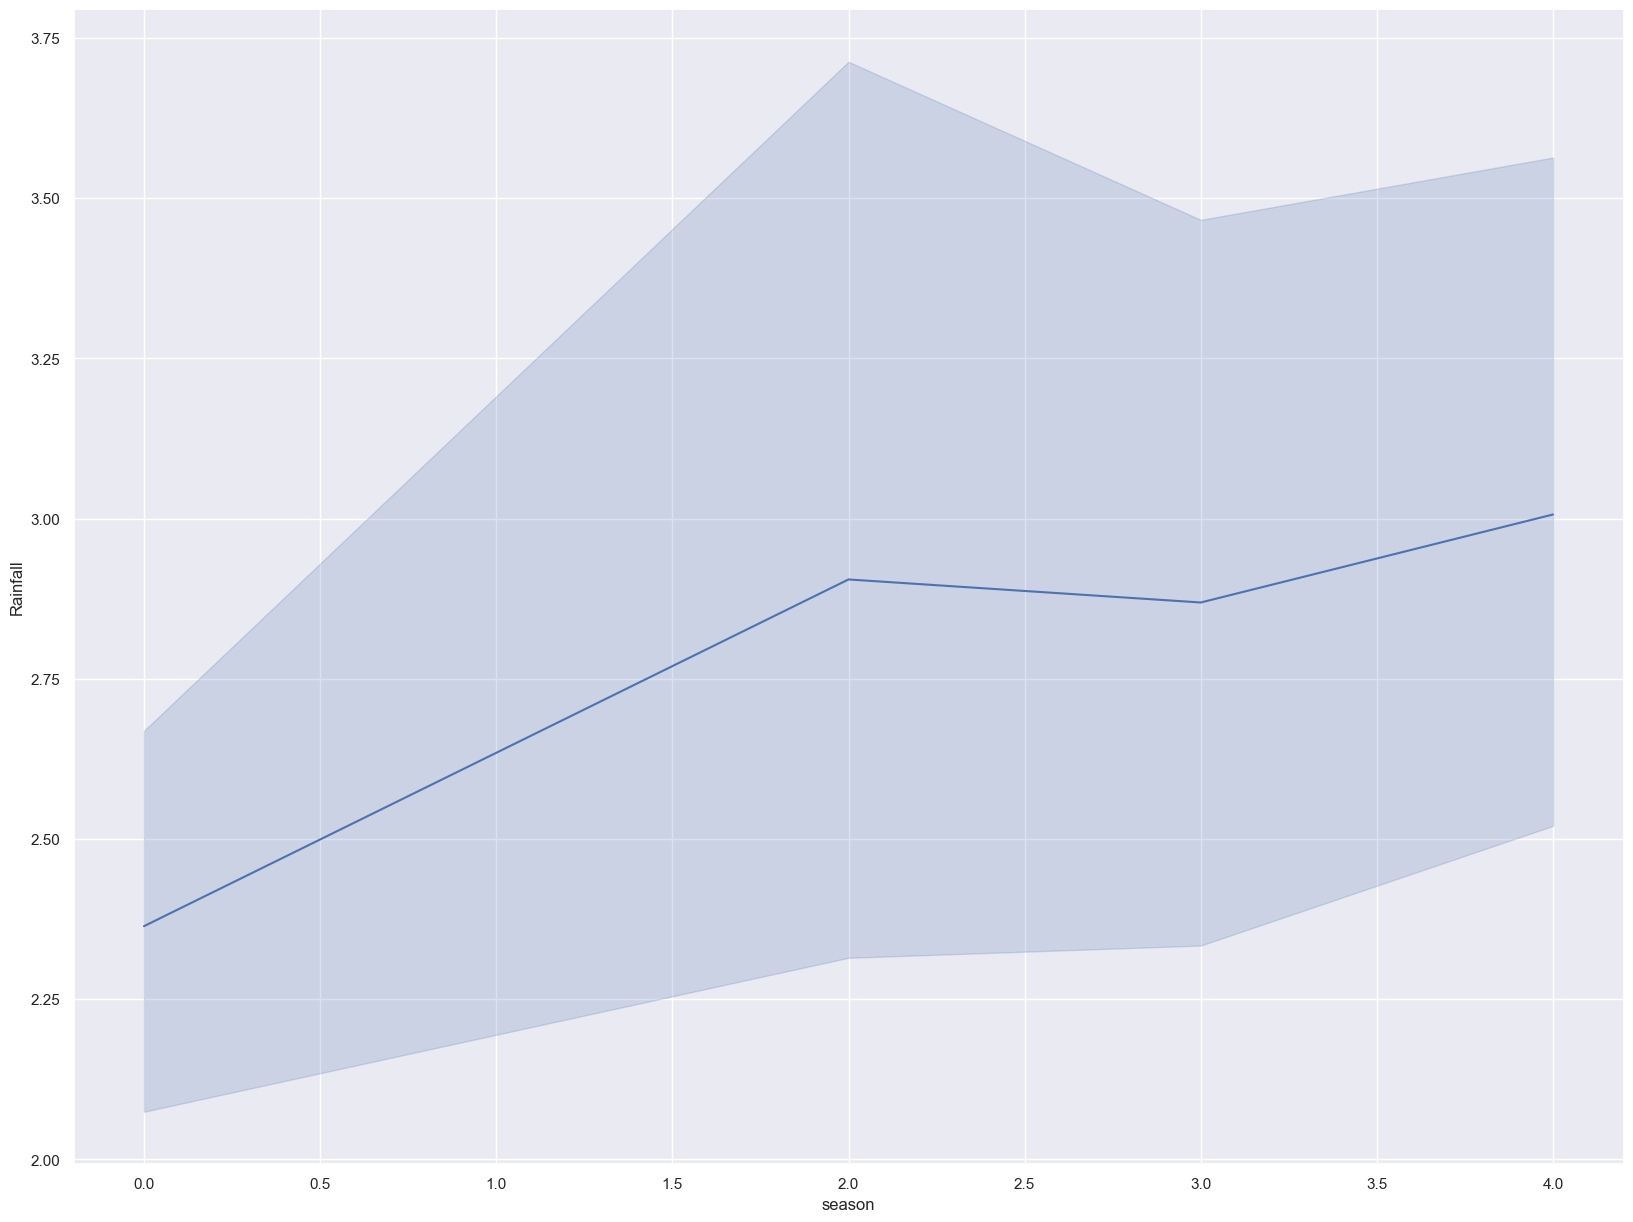

In [66]:
plt.figure(figsize=(20,15))
sns.lineplot(x='season',y='Rainfall',data=df)
sns.set(font_scale=1)

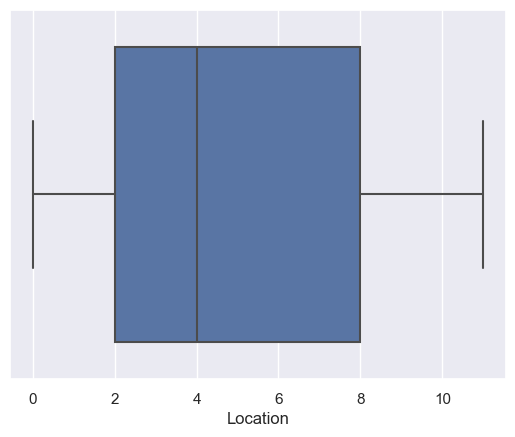

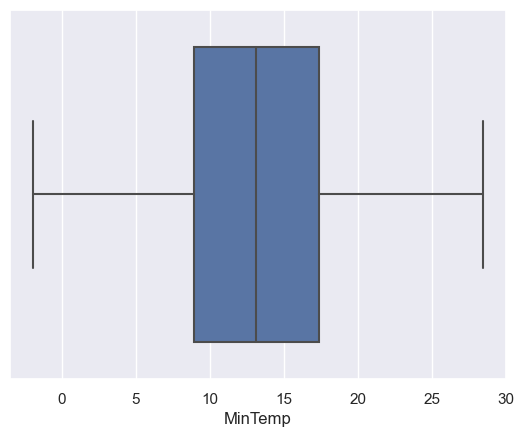

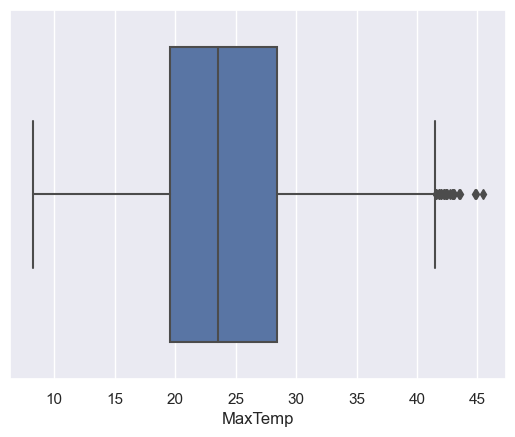

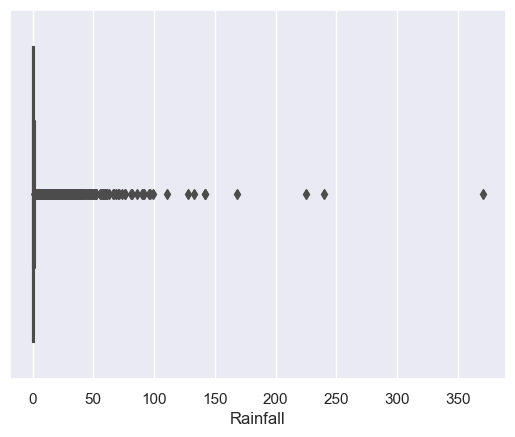

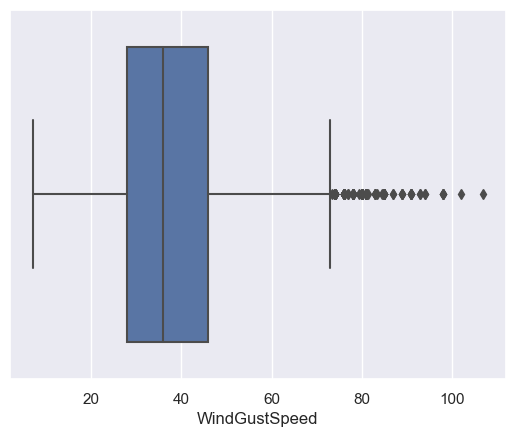

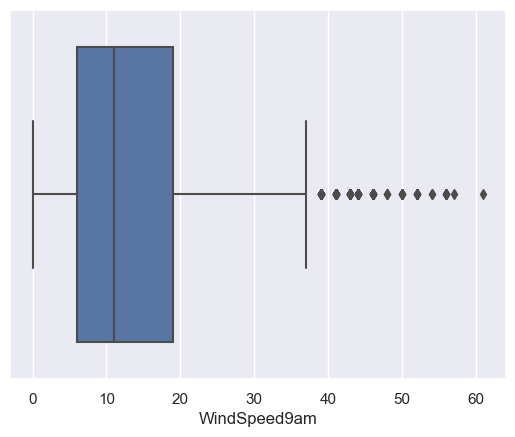

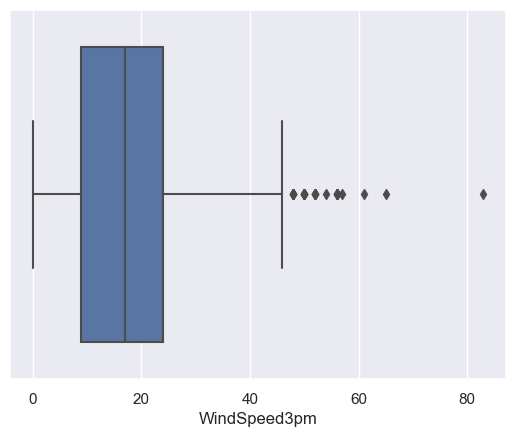

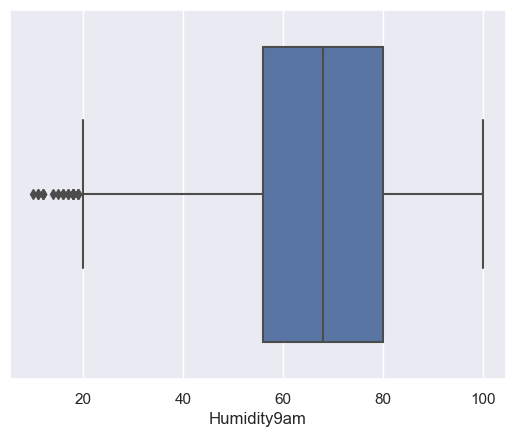

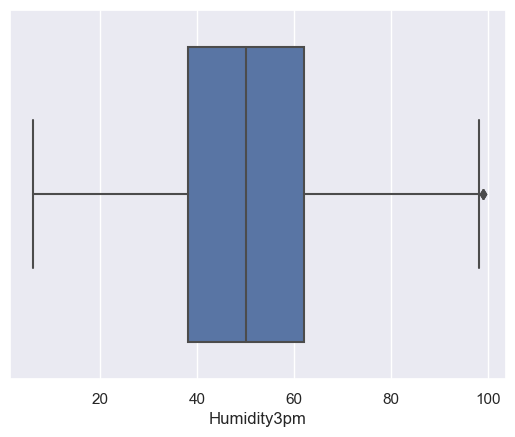

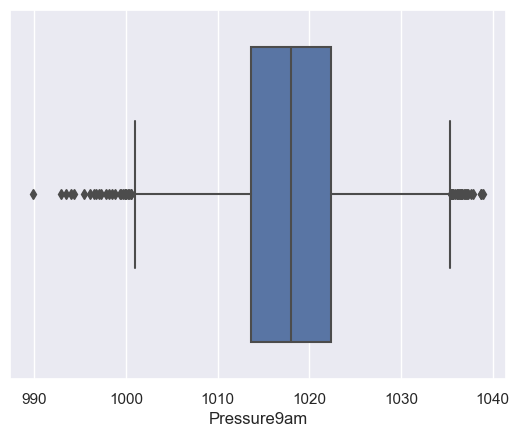

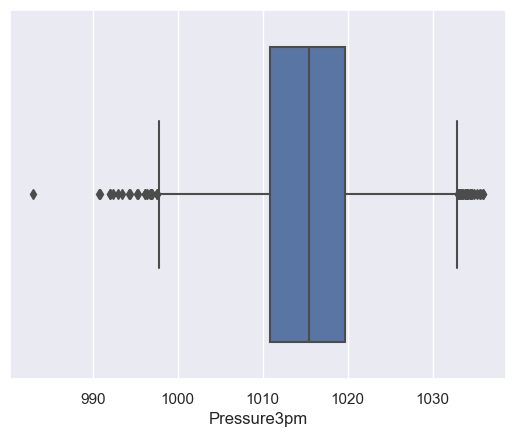

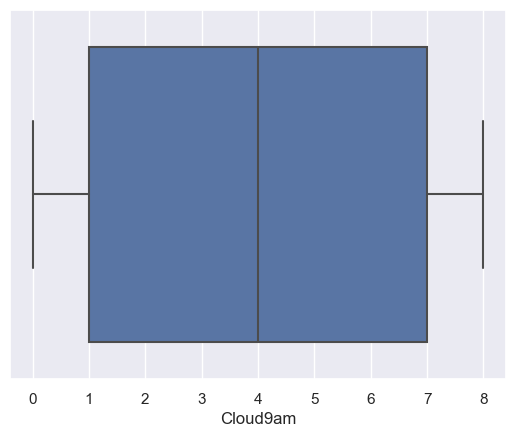

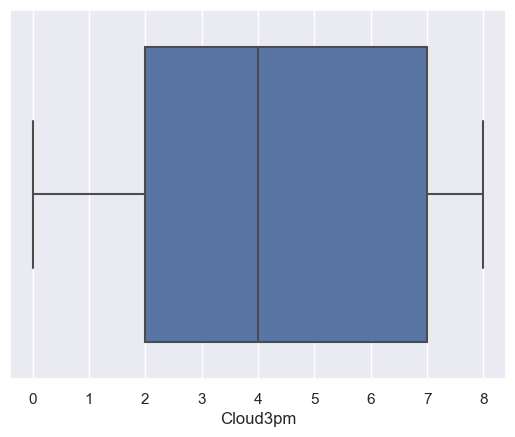

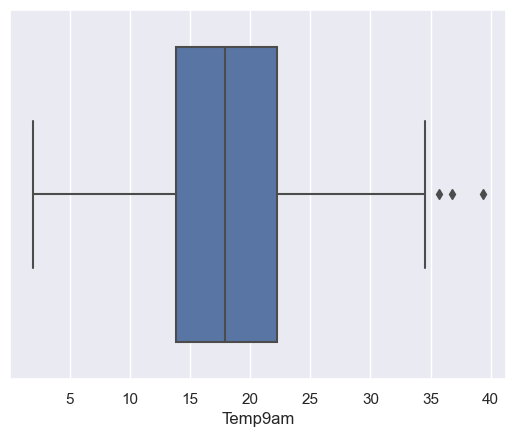

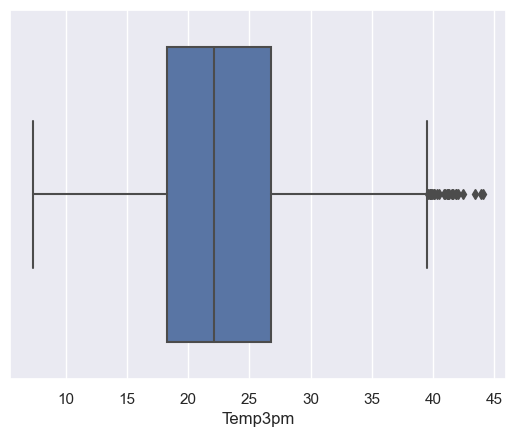

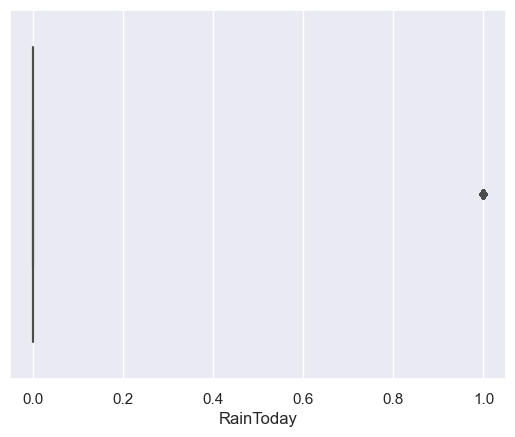

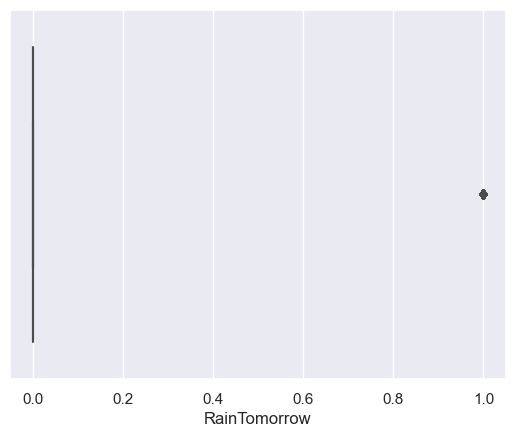

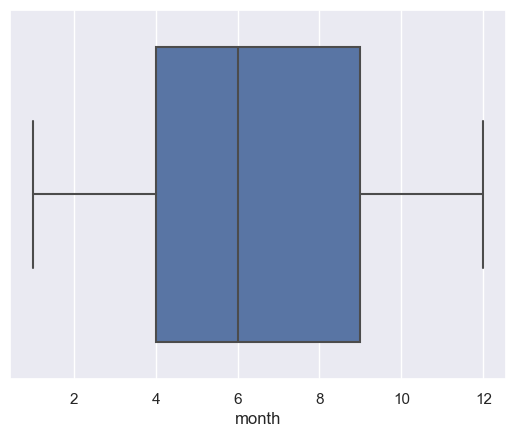

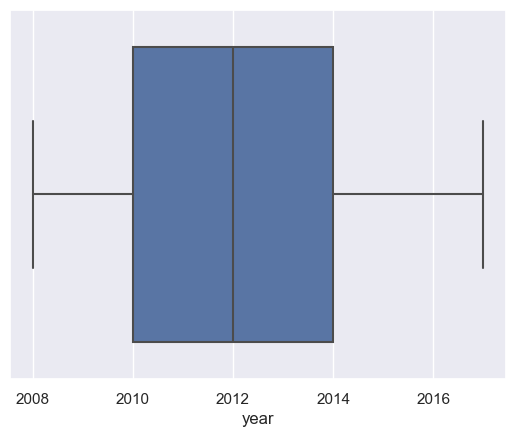

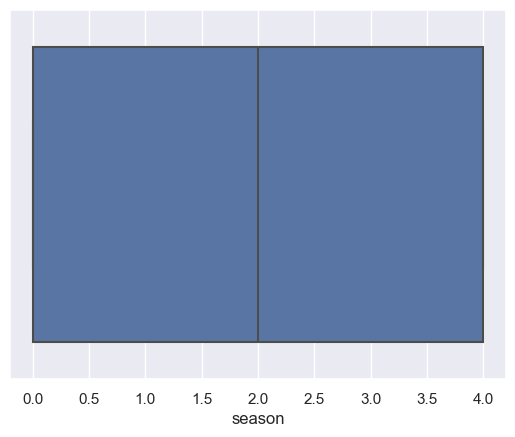

In [67]:
for i in df.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

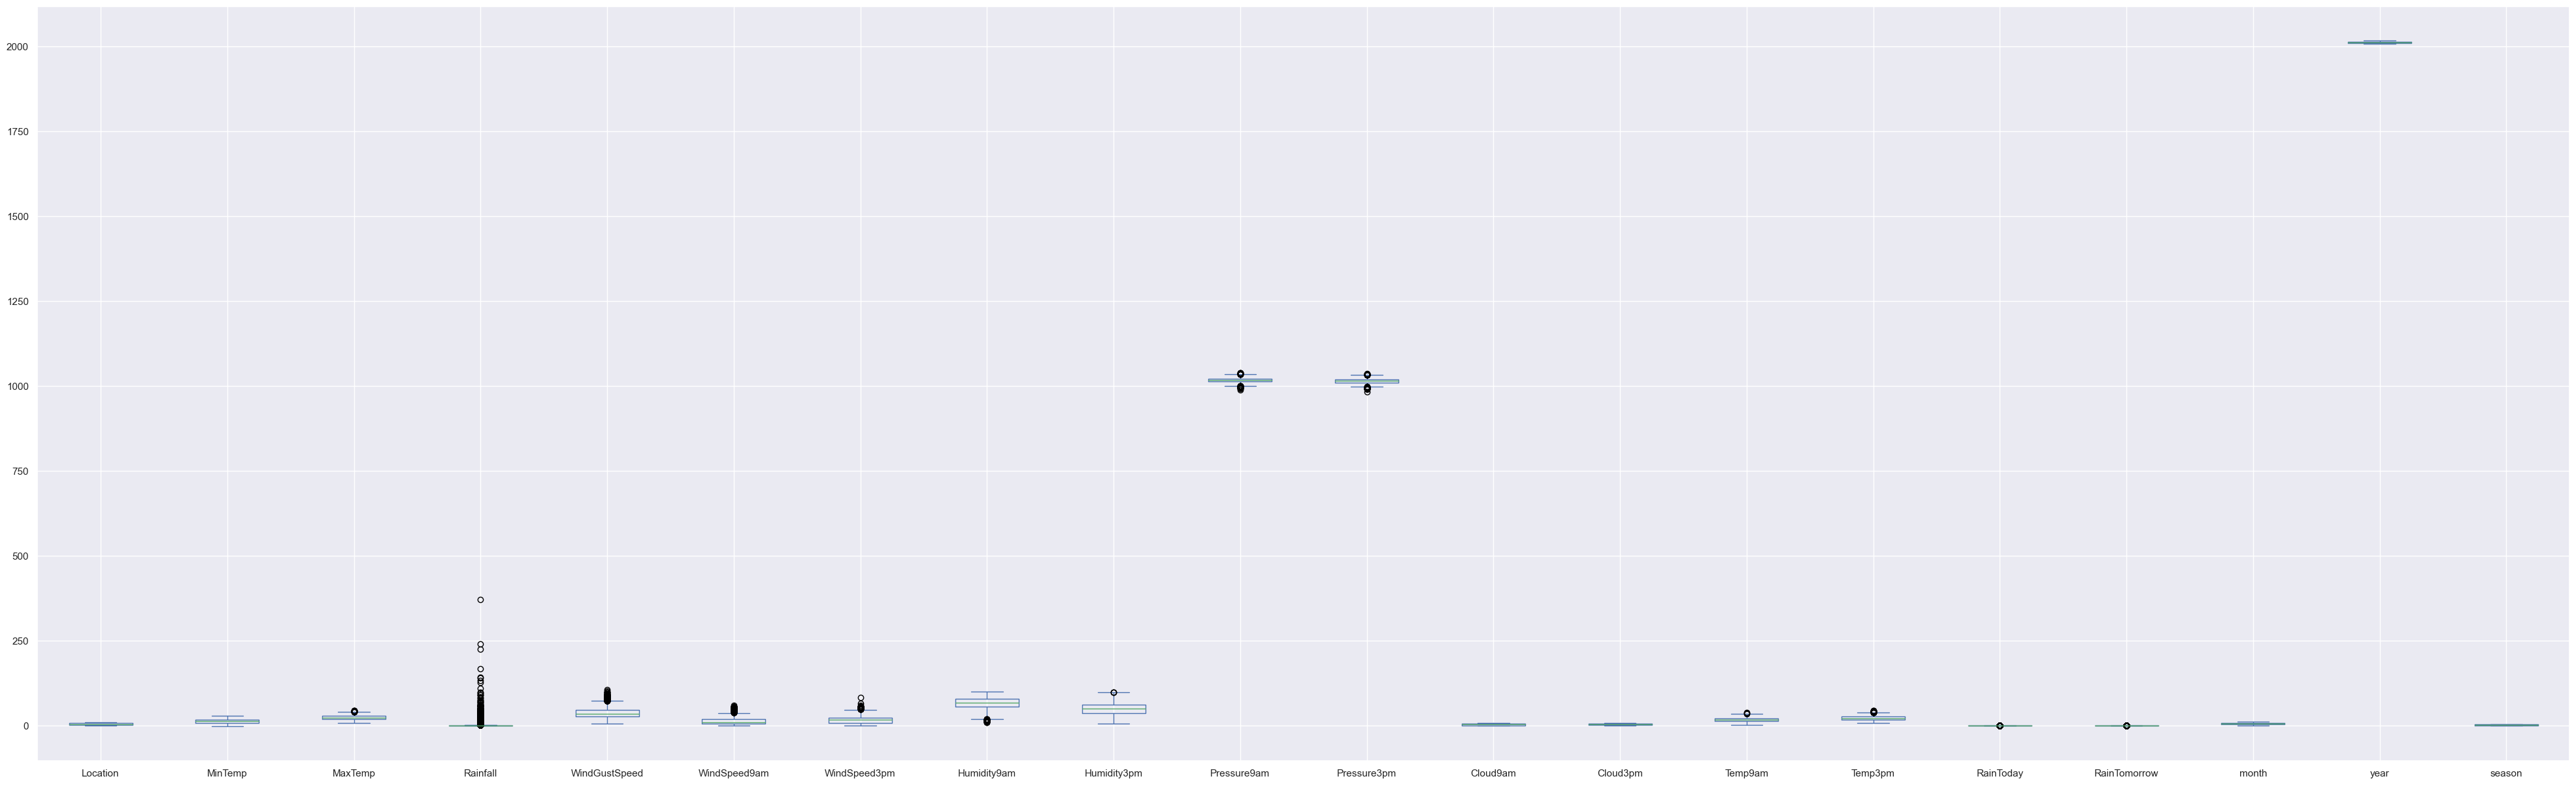

In [68]:
df.plot(kind='box',figsize=(50,15))
sns.set(font_scale=2.5)

.

.

.

In [69]:
sns.set(font_scale=3)

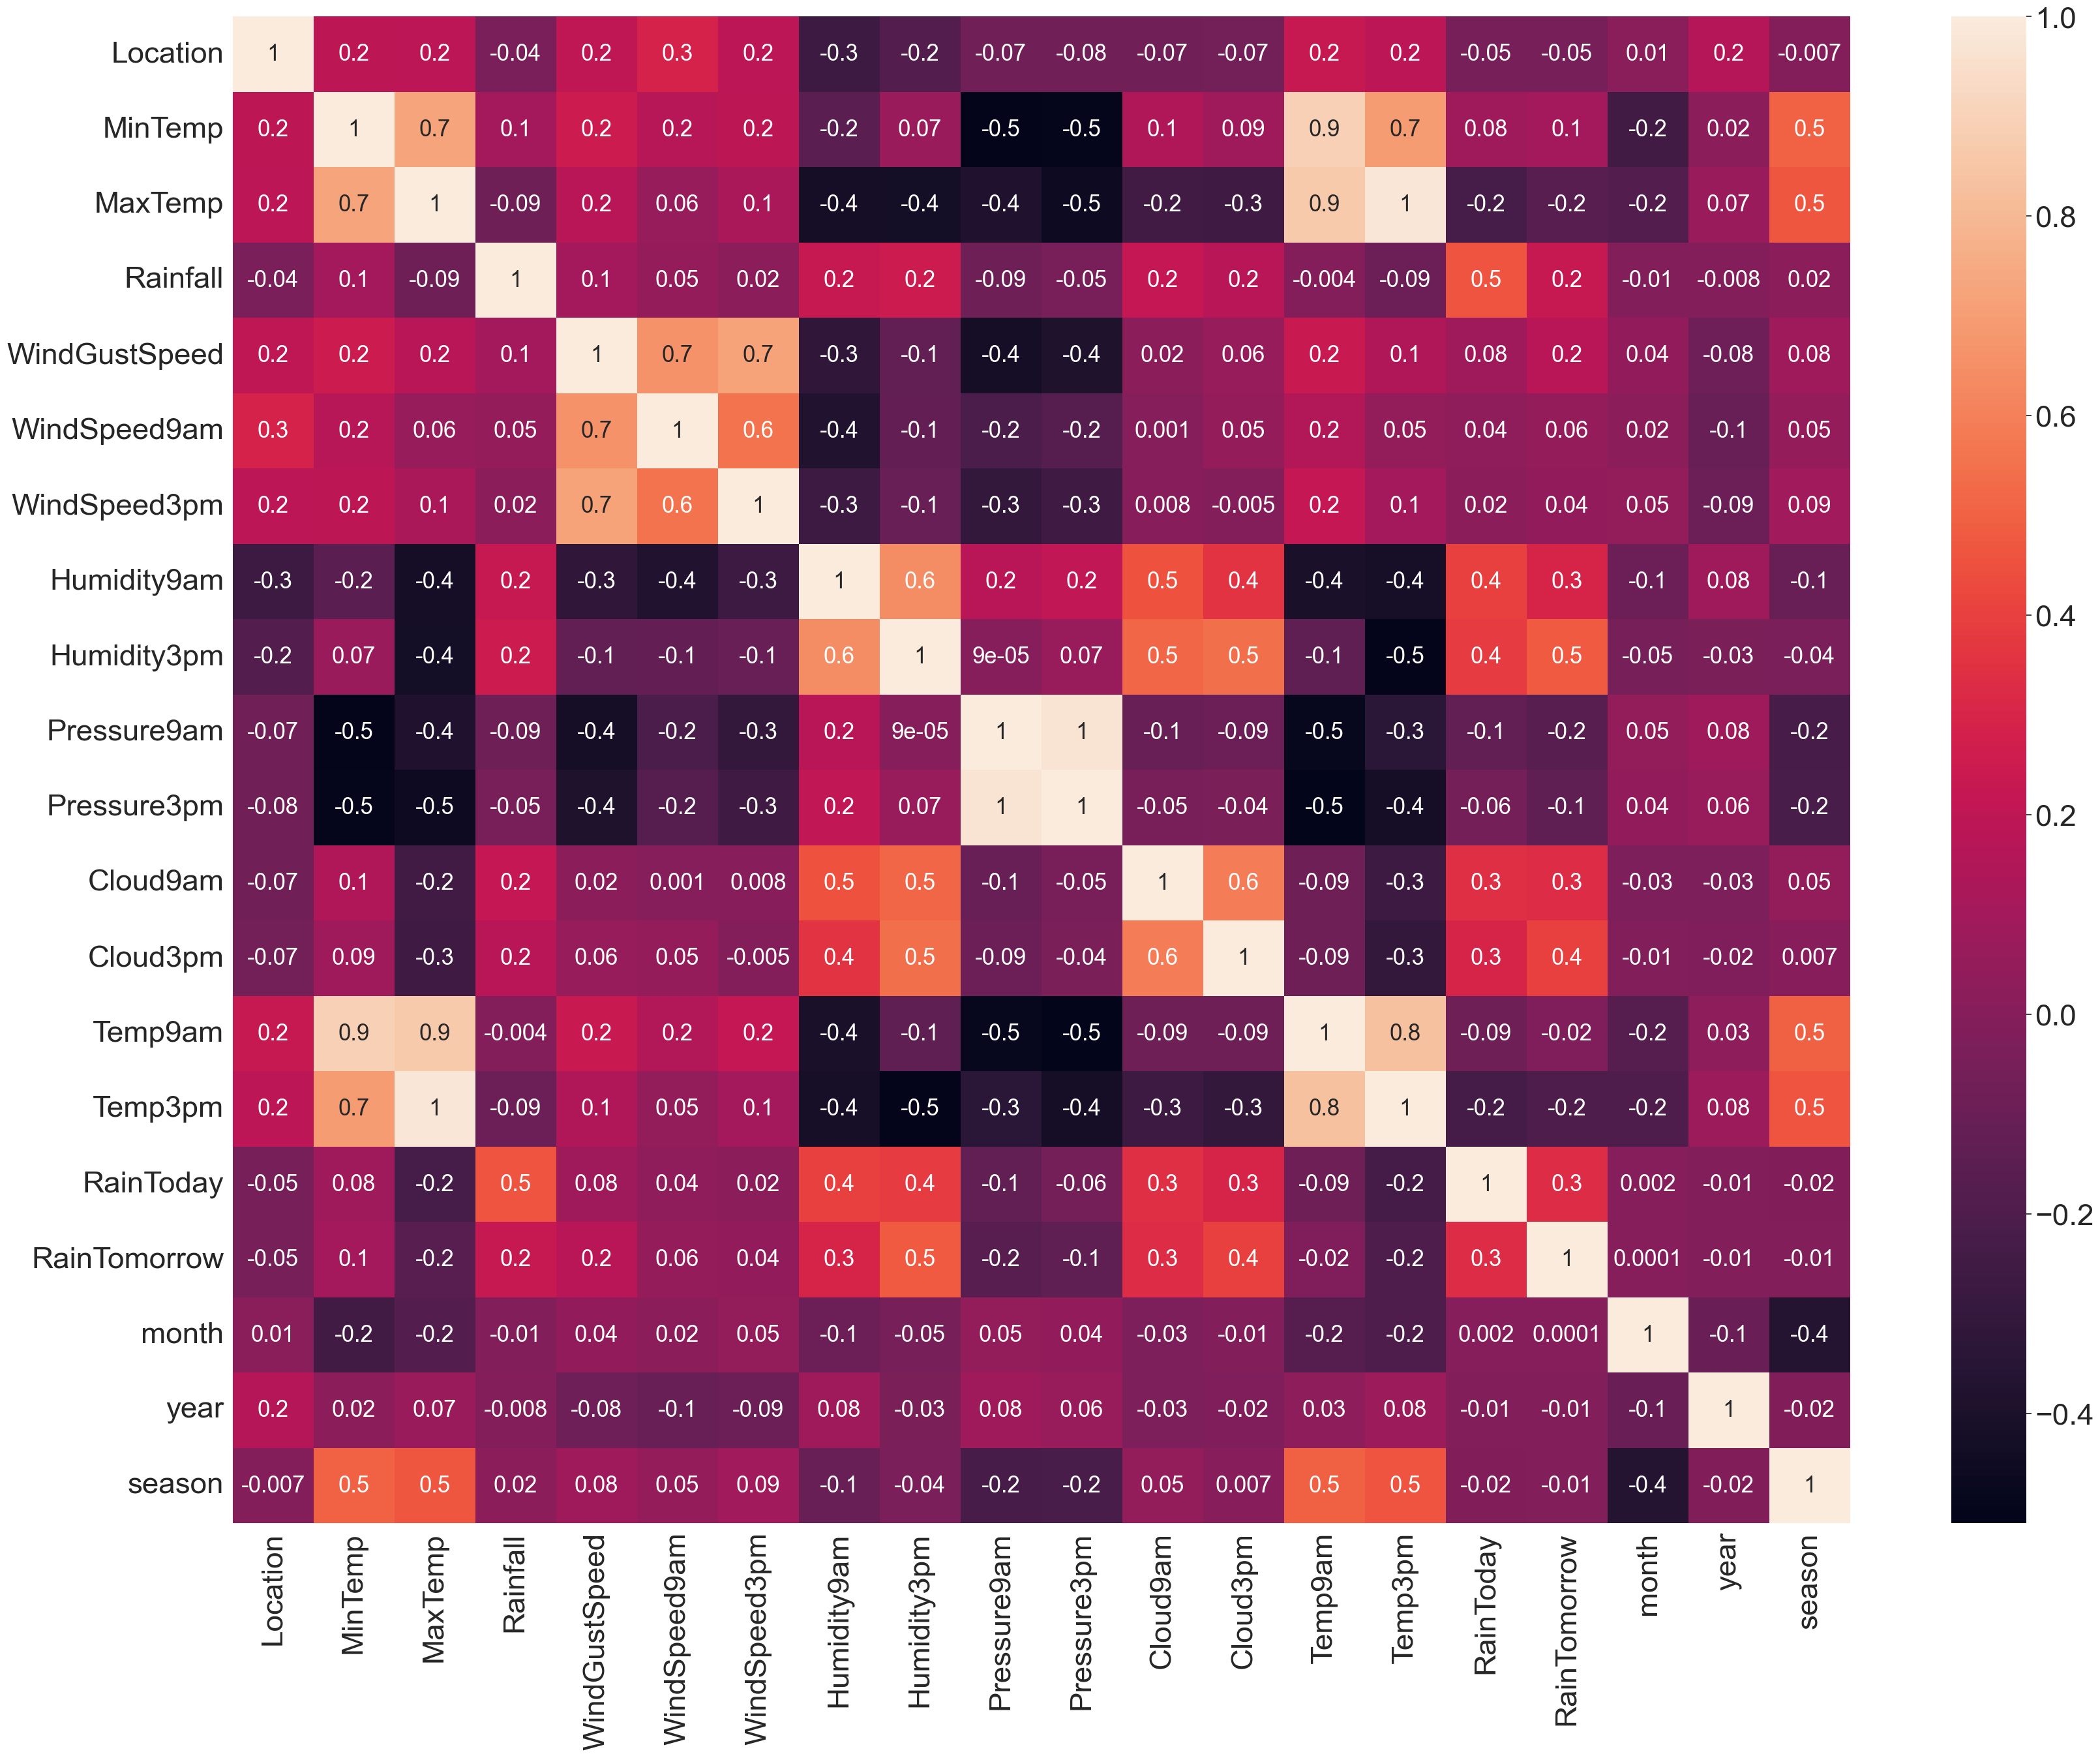

In [70]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),fmt='.1g',annot=True,annot_kws={'fontsize':25})
sns.set(font_scale=3)

In [71]:
# maxTemp = Temp3pm
# Temp3pm = Temp9am
# Pressure3pm = Pressure9am
# Temp3pm is highly correlate with maxTemp and temp9am
# temp9am is highly correlate with minTemp , maxTemp and Temp3pm

In [72]:
df = df.drop(['month', 'year', 'Temp9am', 'Pressure3pm'],axis=1)

In [73]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday',
       'RainTomorrow', 'season'],
      dtype='object')

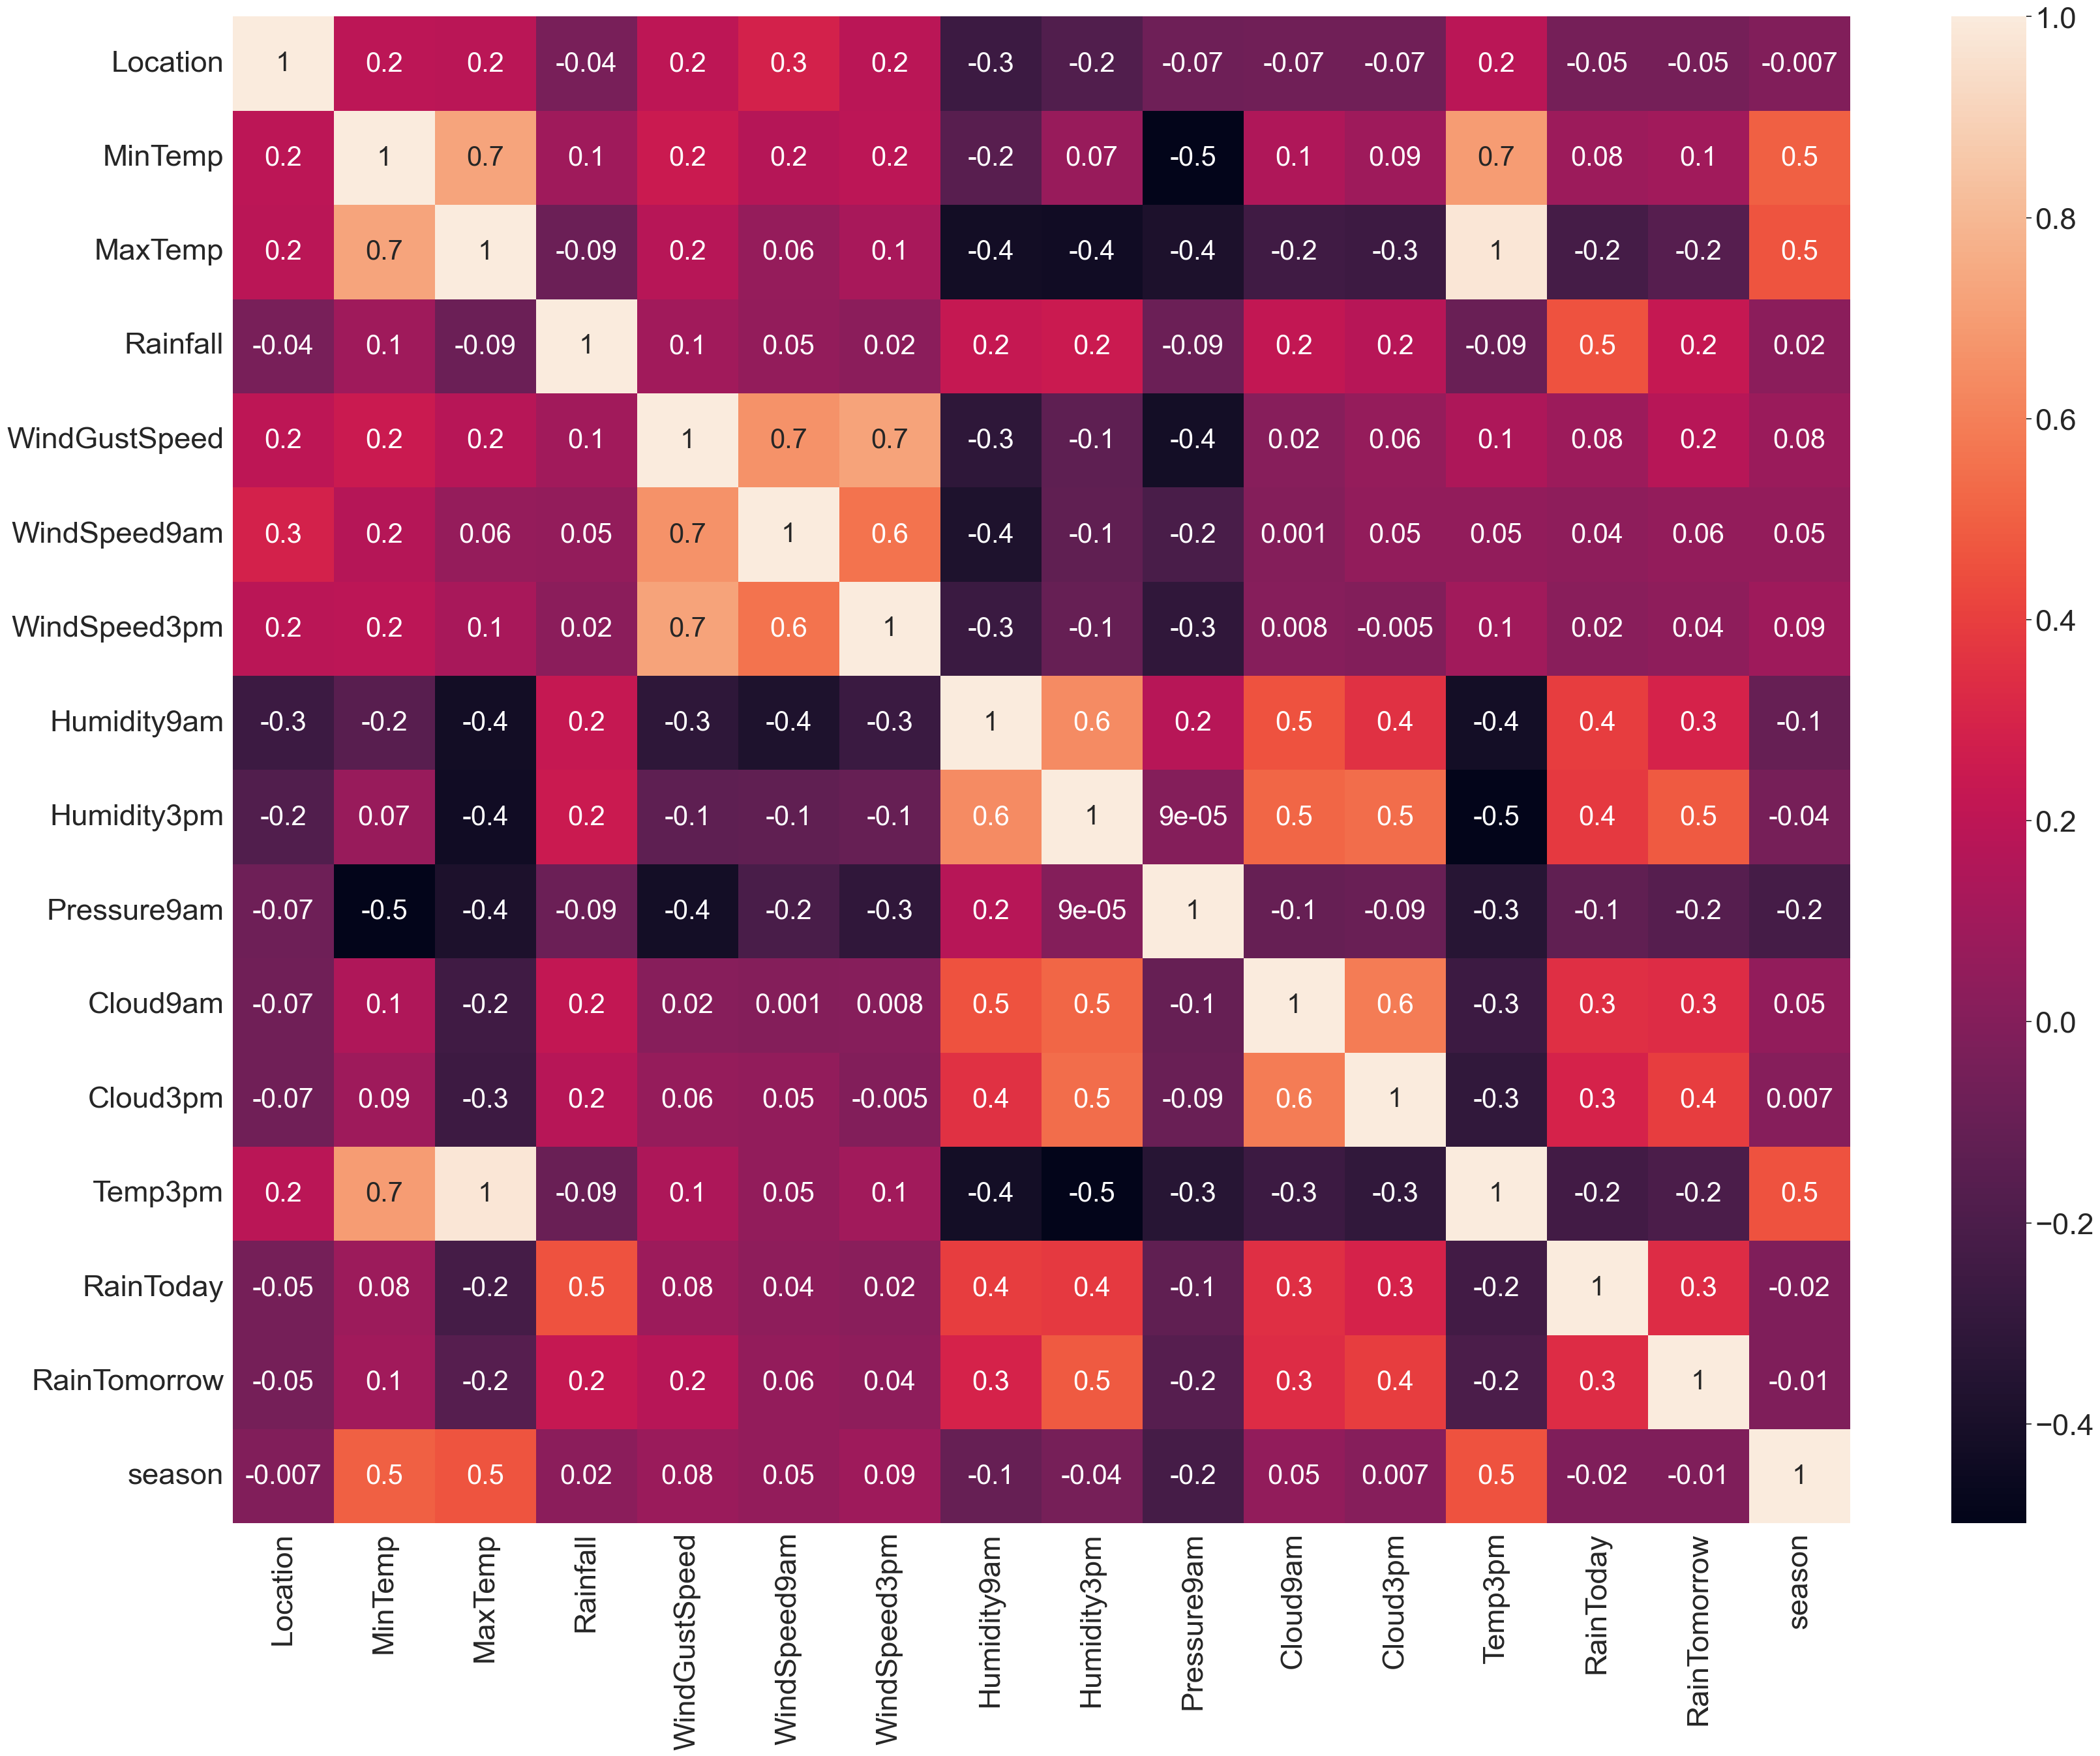

In [74]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),fmt='.1g',annot=True,annot_kws={'fontsize':30})
sns.set(font_scale=3)

In [75]:
df = df.drop('Temp3pm',axis=1)

In [76]:
sns.set(font_scale=1)

# the size of this file exceded 30mb so not running this code
sns.pairplot(data=df,hue='RainToday')
sns.set(font_scale=1)

In [77]:
sns.set(font_scale=2)

In [78]:
df.skew()

Location          0.082046
MinTemp          -0.066463
MaxTemp           0.329488
Rainfall         13.584687
WindGustSpeed     0.740622
WindSpeed9am      0.942677
WindSpeed3pm      0.556960
Humidity9am      -0.247974
Humidity3pm       0.157032
Pressure9am      -0.032287
Cloud9am         -0.014084
Cloud3pm         -0.039363
RainToday         1.238461
RainTomorrow      1.256435
season           -0.355838
dtype: float64

Location
0.0820277280107107


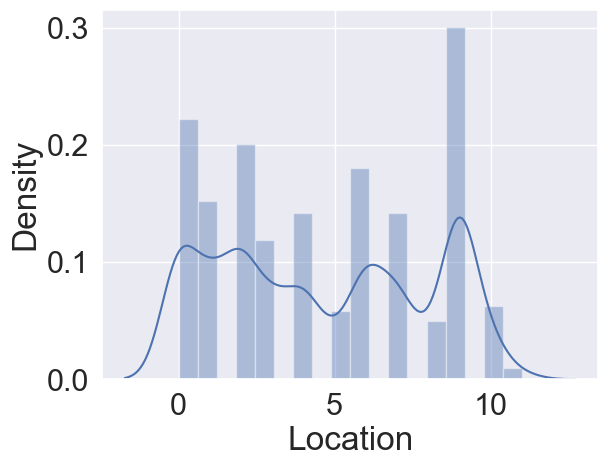

MinTemp
-0.06644794616070213


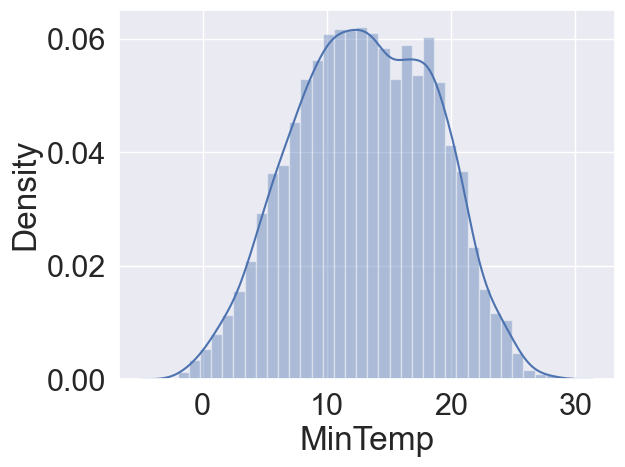

MaxTemp
0.32941312941745343


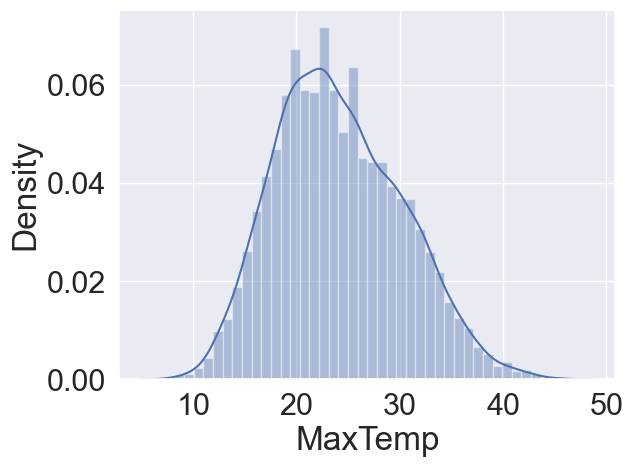

Rainfall
13.581579428692045


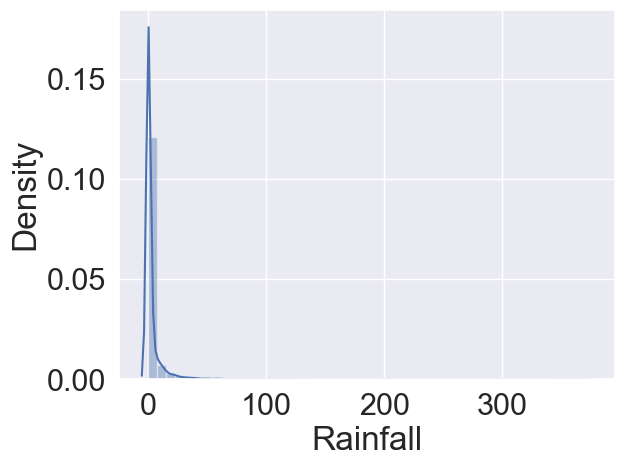

WindGustSpeed
0.7404530622618898


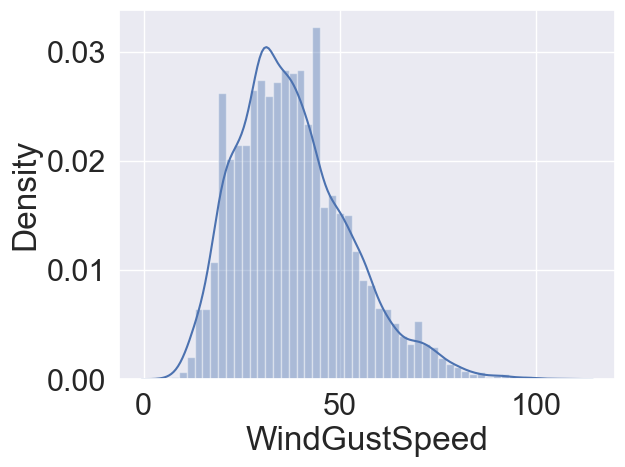

WindSpeed9am
0.9424615696796135


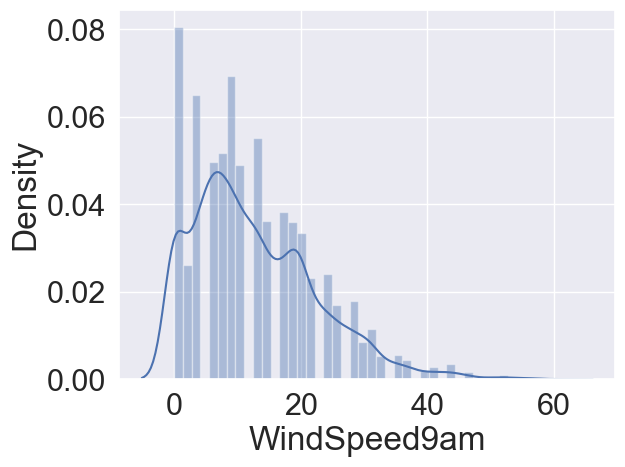

WindSpeed3pm
0.5568327394062073


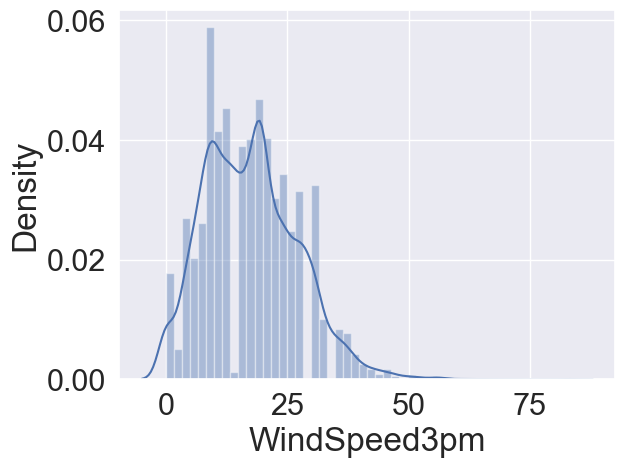

Humidity9am
-0.24791755012691846


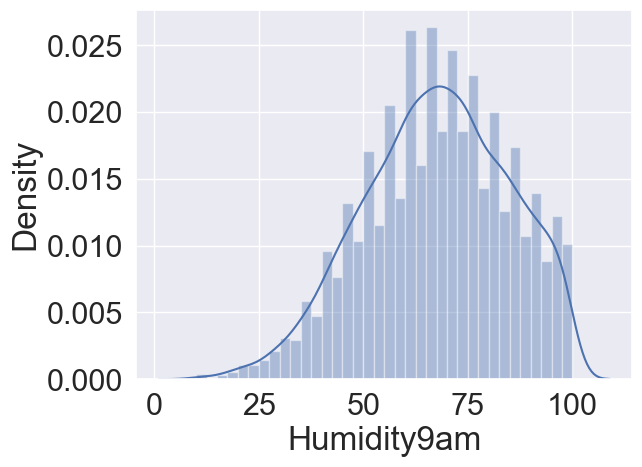

Humidity3pm
0.15699560773092203


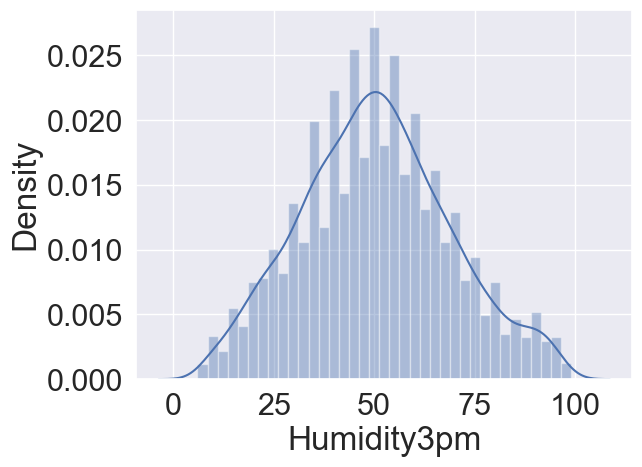

Pressure9am
-0.03227953021901951


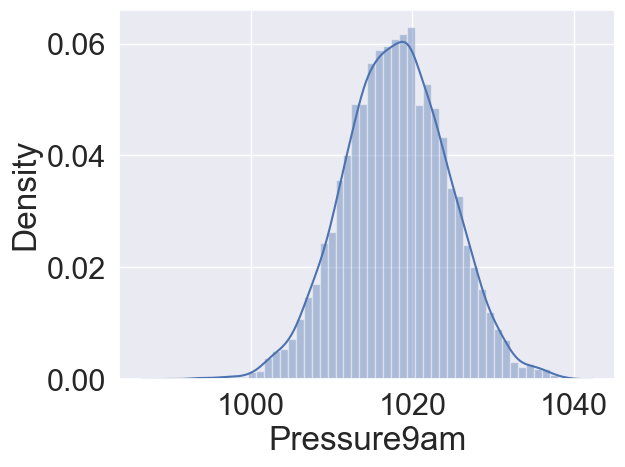

Cloud9am
-0.014080838959004645


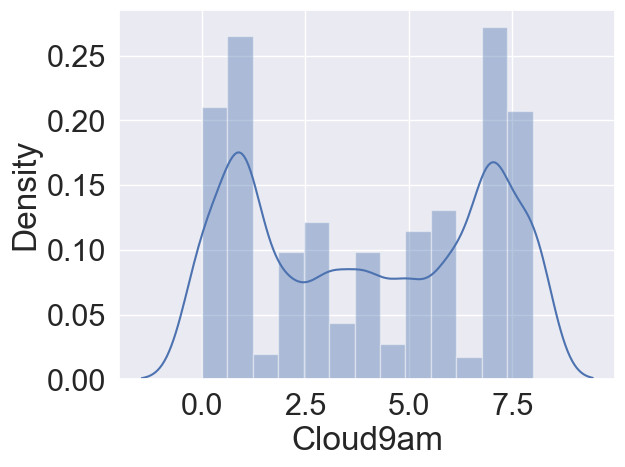

Cloud3pm
-0.039353716679144383


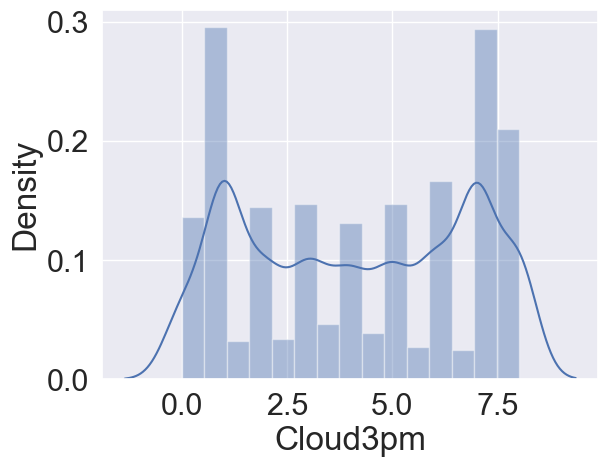

RainToday
1.2381778149376137


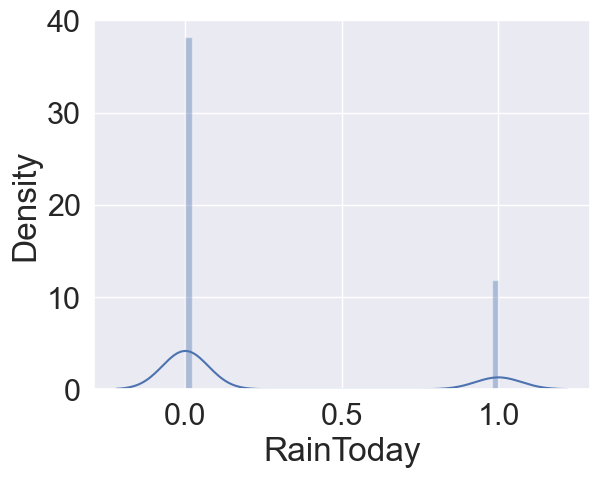

RainTomorrow
1.2561476704423478


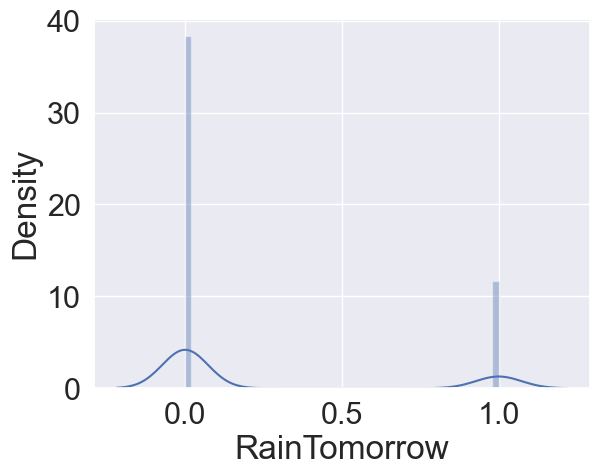

season
-0.35575642451561484


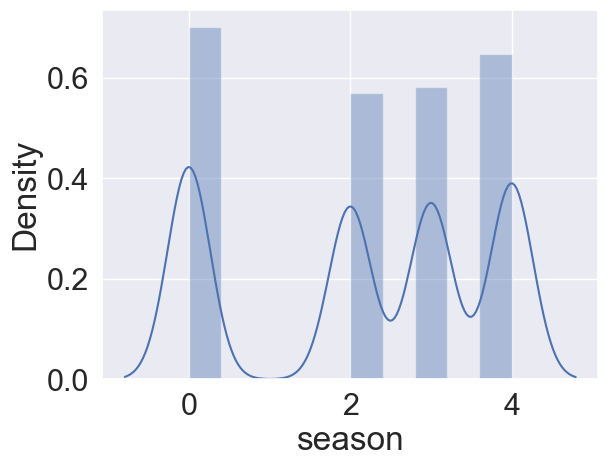

In [79]:
sns.set(font_scale=2)
from scipy.stats import skew
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [80]:
# we should not remove the skewness of the column which has very good correlation with the target , in this case rainfall and rainfalltoday are more than 50% correlated.

In [81]:
important_info = df1.describe().T
important_info['variance'] = important_info['std']**2
important_info['co-variance'] = important_info['std']/important_info['mean']
important_info['skew'] = df1.skew().T
important_info

count         mean        std     min     25%      50%  \
MinTemp        5266.0    13.459818   5.482158    -1.3     9.4    13.50   
MaxTemp        5266.0    24.379966   6.243559     8.2    19.8    23.80   
Rainfall       5266.0     2.745404   9.298133     0.0     0.0     0.00   
WindGustDir    5266.0    97.426889   4.497469    91.0    93.0    97.00   
WindGustSpeed  5266.0    39.804596  14.099860     9.0    30.0    37.00   
WindDir9am     5266.0    97.769654   4.534422    91.0    93.0    98.00   
WindDir3pm     5266.0    97.974364   4.437206    91.0    94.0    98.00   
WindSpeed9am   5266.0    14.599126   9.128572     2.0     7.0    13.00   
WindSpeed3pm   5266.0    18.737562   8.815502     2.0    11.0    19.00   
Humidity9am    5266.0    65.627421  17.144949    10.0    54.0    66.00   
Humidity3pm    5266.0    49.641379  18.782481     6.0    36.0    49.00   
Pressure9am    5266.0  1017.525760   6.555819   989.8  1013.1  1017.50   
Pressure3pm    5266.0  1014.999269   6.487673   982.9  1010.3  1015.05   
Cloud9am       5266.0     4.044721   2.757661     0.0     1.0     4.00   
Cloud3pm       5266.0     4.172427   2.609335     0.0     2.0     4.00   
Temp9am        5266.0    18.336783   5.667167     1.9    14.3    18.20   
Temp3pm        5266.0    22.956362   6.087271     7.3    18.6    22.40   
RainToday      5266.0     0.240980   0.427719     0.0     0.0     0.00   
RainTomorrow   5266.0     0.240030   0.427142     0.0     0.0     0.00   
month          5266.0     6.413787   3.423381     1.0     3.0     6.00   
year           5266.0  2011.751614   2.280147  2008.0  2010.0  2011.00   

                  75%     max    variance  co-variance      skew  
MinTemp          17.7    28.5   30.054059     0.407298 -0.043994  
MaxTemp          28.8    45.5   38.982032     0.256094  0.296200  
Rainfall          0.8   225.0   86.455285     3.386799  8.601063  
WindGustDir     101.0   106.0   20.227227     0.046163  0.242857  
WindGustSpeed    48.0   107.0  198.806064     0.354227  0.763216  
WindDir9am      102.0   106.0   20.560986     0.046379  0.153453  
WindDir3pm      101.0   106.0   19.688801     0.045289  0.161724  
WindSpeed9am     20.0    61.0   83.330818     0.625282  1.015864  
WindSpeed3pm     24.0    61.0   77.713069     0.470472  0.526224  
Humidity9am      78.0   100.0  293.949288     0.261247 -0.187949  
Humidity3pm      62.0    99.0  352.781575     0.378363  0.169098  
Pressure9am    1021.9  1039.0   42.978759     0.006443  0.011850  
Pressure3pm    1019.4  1036.0   42.089906     0.006392  0.037601  
Cloud9am          7.0     8.0    7.604695     0.681793 -0.002660  
Cloud3pm          7.0     8.0    6.808630     0.625376 -0.032386  
Temp9am          22.6    39.4   32.116780     0.309060 -0.011190  
Temp3pm          27.1    44.1   37.054870     0.265167  0.318400  
RainToday         0.0     1.0    0.182943     1.774915  1.211631  
RainTomorrow      0.0     1.0    0.182450     1.779534  1.217713  
month             9.0    12.0   11.719536     0.533753  0.033387  
year           2013.0  2017.0    5.199071     0.001133  0.659710

In [82]:
# skewness of Rainfall is very high and no data is below 75% as shown in above cell 

In [83]:
df.nunique()

Location          12
MinTemp          302
MaxTemp          339
Rainfall         250
WindGustSpeed    130
WindSpeed9am      46
WindSpeed3pm      53
Humidity9am      103
Humidity3pm      115
Pressure9am      700
Cloud9am          17
Cloud3pm          17
RainToday          2
RainTomorrow       2
season             4
dtype: int64

In [85]:
df = df.drop('Location',axis=1)

<Axes: ylabel='RainToday'>

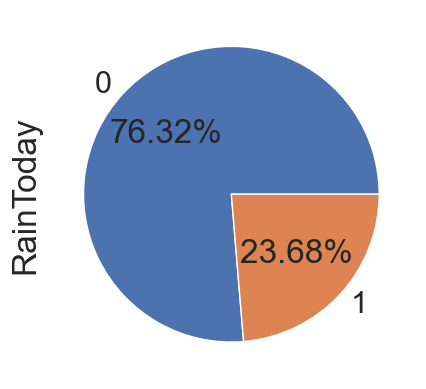

In [86]:
df.RainToday.value_counts().plot.pie(autopct='%.2f%%')

<Axes: ylabel='RainTomorrow'>

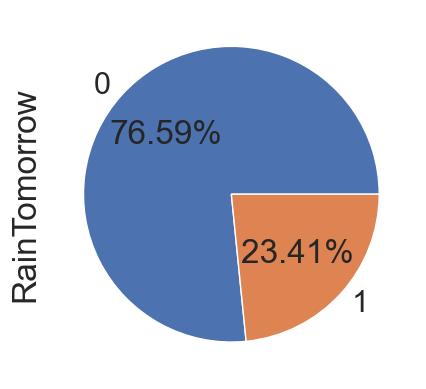

In [87]:
df.RainTomorrow.value_counts().plot.pie(autopct='%.2f%%')

In [88]:
x=df.drop(['RainToday','RainTomorrow'],axis=1)
y=df.RainToday

In [89]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x1,y1 = sm.fit_resample(x,y)

<Axes: ylabel='RainToday'>

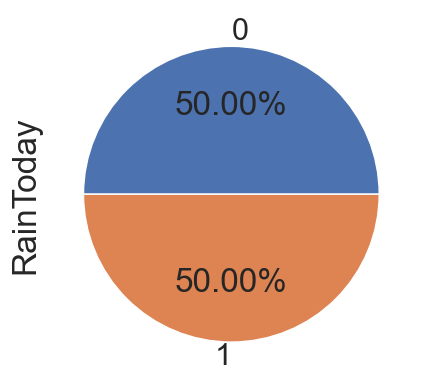

In [90]:
y1.value_counts().plot.pie(autopct='%.2f%%')

.

.

In [91]:
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , BaggingClassifier , RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [92]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x1,y1, random_state=42,test_size=0.30)

sc=StandardScaler()
sc.fit(x_train)

x_train_sca = sc.transform(x_train)
x_test_sca = sc.transform(x_test)

.

In [93]:
knn =KNeighborsClassifier()
knn.fit(x_train_sca,y_train)
knny_pred = knn.predict(x_test_sca)

print('Training  : ',knn.score(x_train_sca,y_train))
print('Testint : ',knn.score(x_test_sca,y_test))

print(classification_report(y_test,knny_pred))

recheck = cross_val_score(knn,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,knny_pred) - recheck.mean())

Training  :  0.918652775795633
Testint :  0.8774558774558775
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1534
           1       0.83      0.94      0.88      1469

    accuracy                           0.88      3003
   macro avg       0.88      0.88      0.88      3003
weighted avg       0.88      0.88      0.88      3003

[0.88185976 0.87957317 0.85289634 0.87566743 0.88100686]
0.874200712544883
difference 0.0032551649109945346


In [94]:
gs = GaussianNB()
gs.fit(x_train_sca,y_train)
gsy_pred = gs.predict(x_test_sca)

print('Training  : ',gs.score(x_train_sca,y_train))
print('Testint : ',gs.score(x_test_sca,y_test))

print(classification_report(y_test,gsy_pred))

recheck = cross_val_score(gs,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gsy_pred) - recheck.mean())

Training  :  0.9748822605965463
Testint :  0.9763569763569764
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1534
           1       0.95      1.00      0.98      1469

    accuracy                           0.98      3003
   macro avg       0.98      0.98      0.98      3003
weighted avg       0.98      0.98      0.98      3003

[0.97713415 0.96265244 0.96112805 0.98627002 0.97559115]
0.9725551617644325
difference 0.0038018145925439173


In [95]:
rfc= RandomForestClassifier()
rfc.fit(x_train_sca,y_train)
rfcy_pred = rfc.predict(x_test_sca)

print('Training  : ',rfc.score(x_train_sca,y_train))
print('Testint : ',rfc.score(x_test_sca,y_test))

print(classification_report(y_test,rfcy_pred))

recheck = cross_val_score(rfc,x,y,cv=12)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,rfcy_pred) - recheck.mean())
print(confusion_matrix(y_test,rfcy_pred))

Training  :  1.0
Testint :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1534
           1       1.00      1.00      1.00      1469

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0
difference 0.0
[[1534    0]
 [   0 1469]]


In [96]:
abc =AdaBoostClassifier()
abc.fit(x_train_sca,y_train)
abcy_pred = abc.predict(x_test_sca)

print('Training  : ',abc.score(x_train_sca,y_train))
print('Testint : ',abc.score(x_test_sca,y_test))

print(classification_report(y_test,abcy_pred))

recheck = cross_val_score(abc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,abcy_pred) - recheck.mean())

Training  :  1.0
Testint :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1534
           1       1.00      1.00      1.00      1469

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003

[1. 1. 1. 1. 1.]
1.0
difference 0.0


In [97]:
gbcbest = GradientBoostingClassifier()
gbcbest.fit(x_train_sca,y_train)
gbcy_pred = gbcbest.predict(x_test_sca)

print('Training  : ',gbcbest.score(x_train_sca,y_train))
print('Testint : ',gbcbest.score(x_test_sca,y_test))

print(accuracy_score(y_test,gbcy_pred))
print(classification_report(y_test,gbcy_pred))

recheck = cross_val_score(gbcbest,x,y,cv=5)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gbcy_pred) - recheck.mean())

Training  :  1.0
Testint :  1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1534
           1       1.00      1.00      1.00      1469

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003

[1. 1. 1. 1. 1.]
1.0
difference 0.0


In [98]:
bc = BaggingClassifier()
bc.fit(x_train_sca,y_train)
bcy_pred = bc.predict(x_test_sca)

print('Training  : ',bc.score(x_train_sca,y_train))
print('Testint : ',bc.score(x_test_sca,y_test))

print(classification_report(y_test,bcy_pred))

recheck = cross_val_score(bc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,bcy_pred) - recheck.mean())

Training  :  1.0
Testint :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1534
           1       1.00      1.00      1.00      1469

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003

[1. 1. 1. 1. 1.]
1.0
difference 0.0


In [99]:
lr = LogisticRegression()
lr.fit(x_train_sca,y_train)
lry_pred = lr.predict(x_test_sca)

print('Training  : ',lr.score(x_train_sca,y_train))
print('Testint : ',lr.score(x_test_sca,y_test))

print(classification_report(y_test,lry_pred))

recheck = cross_val_score(lr,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,lry_pred) - recheck.mean())

Training  :  0.9831596974454118
Testint :  0.9813519813519813
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1534
           1       1.00      0.96      0.98      1469

    accuracy                           0.98      3003
   macro avg       0.98      0.98      0.98      3003
weighted avg       0.98      0.98      0.98      3003

[0.99237805 0.97942073 0.99618902 0.98932113 0.98779558]
0.9890209019367081
difference -0.0076689205847267905


In [100]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train_sca,y_train)
dtcy_pred = dtc.predict(x_test_sca)

print('Training  : ',dtc.score(x_train_sca,y_train))
print('Testint : ',dtc.score(x_test_sca,y_test))

print(classification_report(y_test,dtcy_pred))

recheck = cross_val_score(dtc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,dtcy_pred) - recheck.mean())

Training  :  1.0
Testint :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1534
           1       1.00      1.00      1.00      1469

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003

[1. 1. 1. 1. 1.]
1.0
difference 0.0


In [ ]:
# All models are performing best

.

.

.

In [102]:
x3=df.drop(['RainToday','RainTomorrow'],axis=1)
y3=df.RainTomorrow

In [103]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x4,y4 = sm.fit_resample(x3,y3)

<Axes: ylabel='RainTomorrow'>

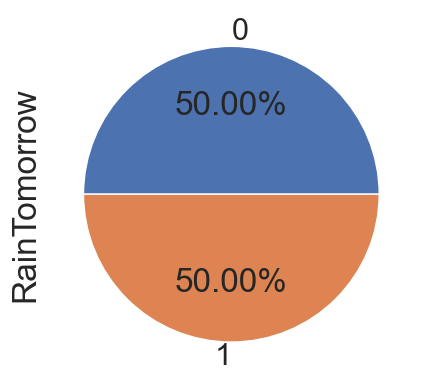

In [104]:
y4.value_counts().plot.pie(autopct='%.2f%%')

In [105]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x1,y1, random_state=42,test_size=0.30)

sc=StandardScaler()
sc.fit(x_train)

x_train_sca = sc.transform(x_train)
x_test_sca = sc.transform(x_test)

.

In [106]:
lr = LogisticRegression()
lr.fit(x_train_sca,y_train)
lry_pred = lr.predict(x_test_sca)

print('Training  : ',lr.score(x_train_sca,y_train))
print('Testint : ',lr.score(x_test_sca,y_test))

print(classification_report(y_test,lry_pred))

recheck = cross_val_score(lr,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,lry_pred) - recheck.mean())

Training  :  0.9831596974454118
Testint :  0.9813519813519813
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1534
           1       1.00      0.96      0.98      1469

    accuracy                           0.98      3003
   macro avg       0.98      0.98      0.98      3003
weighted avg       0.98      0.98      0.98      3003

[0.99237805 0.97942073 0.99618902 0.98932113 0.98779558]
0.9890209019367081
difference -0.0076689205847267905


In [107]:
gs = GaussianNB()
gs.fit(x_train_sca,y_train)
gsy_pred = gs.predict(x_test_sca)

print('Training  : ',gs.score(x_train_sca,y_train))
print('Testint : ',gs.score(x_test_sca,y_test))

print(classification_report(y_test,gsy_pred))

recheck = cross_val_score(gs,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gsy_pred) - recheck.mean())

Training  :  0.9748822605965463
Testint :  0.9763569763569764
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1534
           1       0.95      1.00      0.98      1469

    accuracy                           0.98      3003
   macro avg       0.98      0.98      0.98      3003
weighted avg       0.98      0.98      0.98      3003

[0.97713415 0.96265244 0.96112805 0.98627002 0.97559115]
0.9725551617644325
difference 0.0038018145925439173


In [108]:
knn =KNeighborsClassifier()
knn.fit(x_train_sca,y_train)
knny_pred = knn.predict(x_test_sca)

print('Training  : ',knn.score(x_train_sca,y_train))
print('Testint : ',knn.score(x_test_sca,y_test))

print(classification_report(y_test,knny_pred))

recheck = cross_val_score(knn,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,knny_pred) - recheck.mean())

Training  :  0.918652775795633
Testint :  0.8774558774558775
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1534
           1       0.83      0.94      0.88      1469

    accuracy                           0.88      3003
   macro avg       0.88      0.88      0.88      3003
weighted avg       0.88      0.88      0.88      3003

[0.88185976 0.87957317 0.85289634 0.87566743 0.88100686]
0.874200712544883
difference 0.0032551649109945346


In [109]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train_sca,y_train)
dtcy_pred = dtc.predict(x_test_sca)

print('Training  : ',dtc.score(x_train_sca,y_train))
print('Testint : ',dtc.score(x_test_sca,y_test))

print(classification_report(y_test,dtcy_pred))

recheck = cross_val_score(dtc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,dtcy_pred) - recheck.mean())

Training  :  1.0
Testint :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1534
           1       1.00      1.00      1.00      1469

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003

[1. 1. 1. 1. 1.]
1.0
difference 0.0


In [110]:
rfc= RandomForestClassifier()
rfc.fit(x_train_sca,y_train)
rfcy_pred = rfc.predict(x_test_sca)

print('Training  : ',rfc.score(x_train_sca,y_train))
print('Testint : ',rfc.score(x_test_sca,y_test))

print(classification_report(y_test,rfcy_pred))

recheck = cross_val_score(rfc,x,y,cv=12)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,rfcy_pred) - recheck.mean())
print(confusion_matrix(y_test,rfcy_pred))

Training  :  1.0
Testint :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1534
           1       1.00      1.00      1.00      1469

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0
difference 0.0
[[1534    0]
 [   0 1469]]


In [111]:
abc =AdaBoostClassifier()
abc.fit(x_train_sca,y_train)
abcy_pred = abc.predict(x_test_sca)

print('Training  : ',abc.score(x_train_sca,y_train))
print('Testint : ',abc.score(x_test_sca,y_test))

print(classification_report(y_test,abcy_pred))

recheck = cross_val_score(abc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,abcy_pred) - recheck.mean())

Training  :  1.0
Testint :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1534
           1       1.00      1.00      1.00      1469

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003

[1. 1. 1. 1. 1.]
1.0
difference 0.0


In [112]:
gbcbest = GradientBoostingClassifier()
gbcbest.fit(x_train_sca,y_train)
gbcy_pred = gbcbest.predict(x_test_sca)

print('Training  : ',gbcbest.score(x_train_sca,y_train))
print('Testint : ',gbcbest.score(x_test_sca,y_test))

print(classification_report(y_test,gbcy_pred))

recheck = cross_val_score(gbcbest,x,y,cv=5)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gbcy_pred) - recheck.mean())

Training  :  1.0
Testint :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1534
           1       1.00      1.00      1.00      1469

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003

[1. 1. 1. 1. 1.]
1.0
difference 0.0


In [113]:
bc = BaggingClassifier()
bc.fit(x_train_sca,y_train)
bcy_pred = bc.predict(x_test_sca)

print('Training  : ',bc.score(x_train_sca,y_train))
print('Testint : ',bc.score(x_test_sca,y_test))

print(classification_report(y_test,bcy_pred))

recheck = cross_val_score(bc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,bcy_pred) - recheck.mean())

Training  :  1.0
Testint :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1534
           1       1.00      1.00      1.00      1469

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003

[1. 1. 1. 1. 1.]
1.0
difference 0.0


.

.

.

# Every model is performing great but we will choose "LogisticRegression"

In [114]:
import joblib
joblib.dump(rfc,'weatherAUS.obj')

['weatherAUS.obj']